In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

from pathlib import Path
# import tensorflow as tf
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import requests
import seaborn as sns

#Importing Libraries
from sklearn.svm import SVC

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#from qiskit.utils import algorithm_globals
from qiskit.circuit.library import PauliFeatureMap, ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_machine_learning.algorithms.classifiers import QSVC
from qiskit.circuit import QuantumCircuit
from qiskit import transpile
from qiskit.circuit.library import RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import BaseSampler
#from qiskit.primitives import Sampler
#from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

from sklearn.pipeline import make_pipeline
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit import transpile
from sklearn.svm import SVC
import pandas as pd
import time

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

np.random.seed(42)
#algorithm_globals.random_seed = 123

/Users/sthefaniepasso/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Data Processing

In [1]:
# Define the dataset path
dataset_path = "/Users/sthefaniepasso/.cache/kagglehub/datasets/saurabhshahane/classification-of-malwares/versions/1"

# List files in the directory to find the CSV file
files = os.listdir(dataset_path)
csv_files = [f for f in files if f.endswith('.csv')]

# Load the first CSV file (assuming there's only one)
if csv_files:
    df = pd.read_csv(os.path.join(dataset_path, csv_files[0]))
    print("CSV found and send to df")  # Display first few rows
else:
    print("No CSV file found in the dataset directory.")

CSV found and send to df


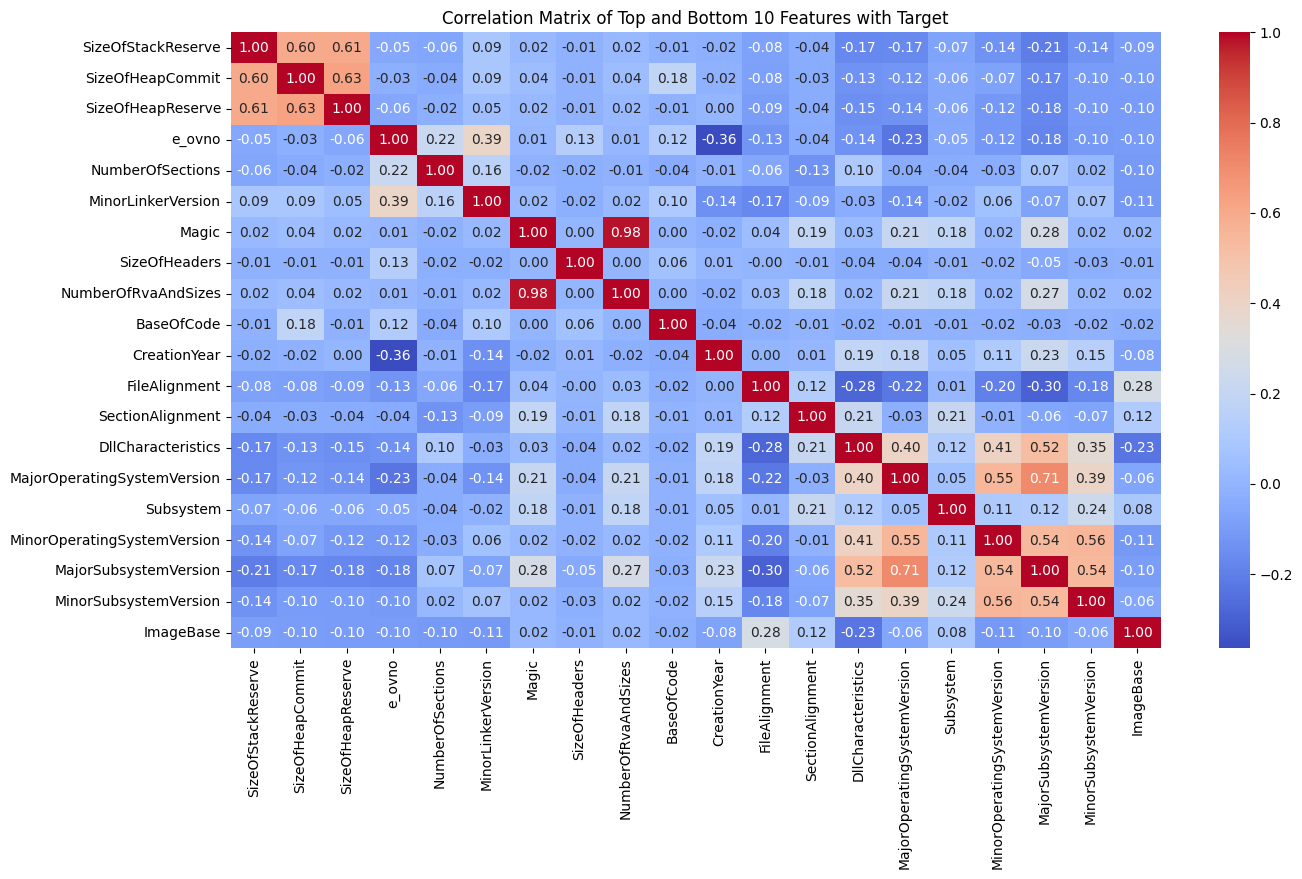

In [31]:
# Assuming 'df' is your DataFrame and 'target' is your target column
target = 'class'

# Step 1: Drop columns with missing values
df_cleaned = df.dropna(axis=1)
df_cleaned = df_cleaned.drop(columns=["e_magic", "e_crlc"])
# Step 2: Check for remaining missing values (optional, for verification)
#print(df_cleaned.isna().sum())

# Step 3: Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Step 4: Get the 10 most and 10 least correlated features with the target
target_correlations = correlation_matrix[target].sort_values(ascending=False)

# Top 10 most correlated features
top_10_correlated = target_correlations[1:11]  # Exclude the target itself

# Bottom 10 least correlated features
bottom_10_correlated = target_correlations[-10:]

# Step 5: Combine into a new DataFrame
df_new = pd.concat([top_10_correlated, bottom_10_correlated])

# Step 6: Plot the new correlation matrix
correlation_matrix_new = df_cleaned[df_new.index].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Top and Bottom 10 Features with Target')
plt.show()

/var/folders/76/rnc3b19s2c3d8yj4hy6tjvkw0000gn/T/ipykernel_11488/1858389140.py:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = correlation_matrix_new.applymap(format_annotation)


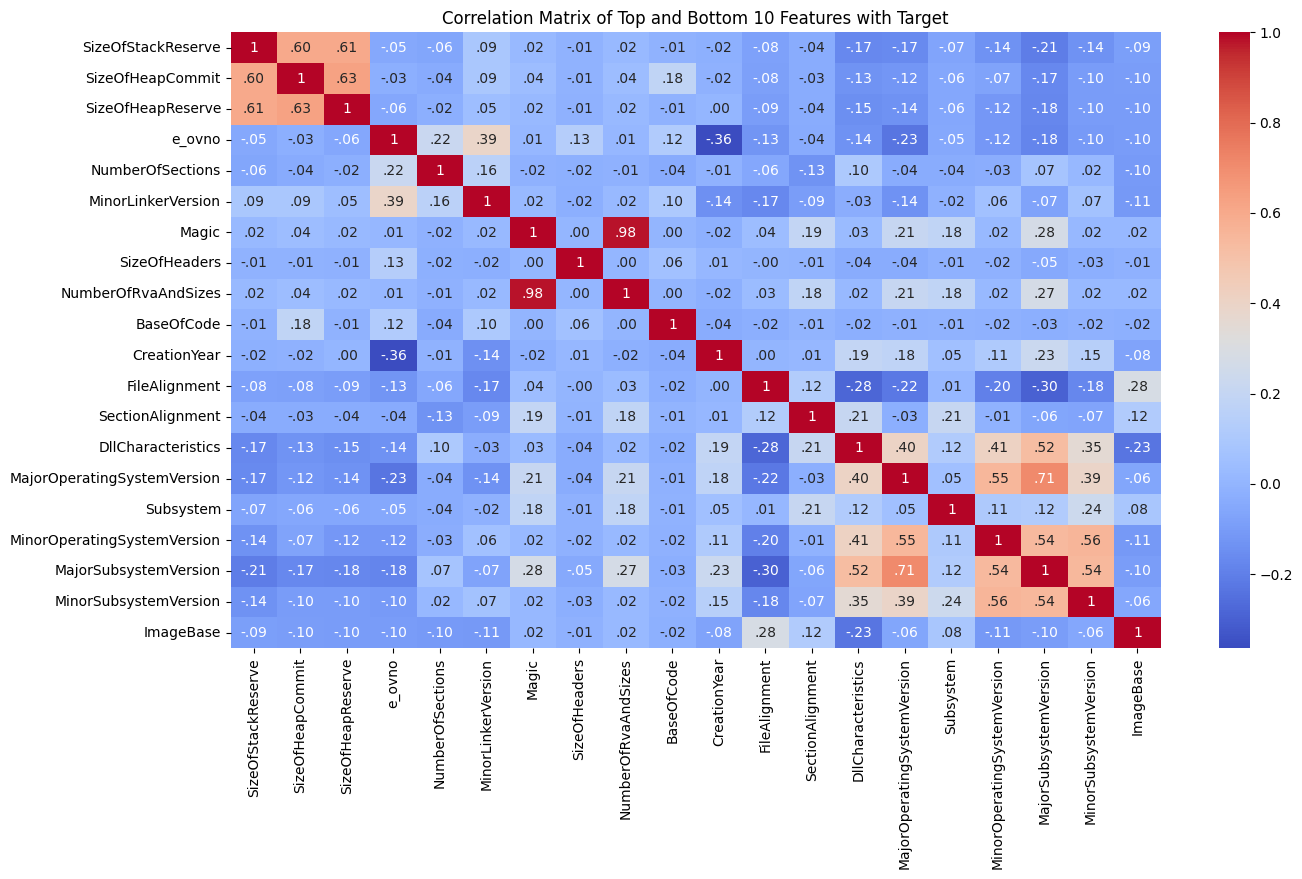

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'target' is your target column
target = 'class'

# Step 1: Drop columns with missing values
df_cleaned = df.dropna(axis=1)
df_cleaned = df_cleaned.drop(columns=["e_magic", "e_crlc"])

# Step 2: Check for remaining missing values (optional, for verification)
#print(df_cleaned.isna().sum())

# Step 3: Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Step 4: Get the 10 most and 10 least correlated features with the target
target_correlations = correlation_matrix[target].sort_values(ascending=False)

# Top 10 most correlated features
top_10_correlated = target_correlations[1:11]  # Exclude the target itself

# Bottom 10 least correlated features
bottom_10_correlated = target_correlations[-10:]

# Step 5: Combine into a new DataFrame
df_new = pd.concat([top_10_correlated, bottom_10_correlated])

# Step 6: Plot the new correlation matrix
correlation_matrix_new = df_cleaned[df_new.index].corr()

# Custom formatting function
def format_annotation(val):
    if val == 1.0:
        return "1"  # Display 1.0 as 1
    elif val == -1.0:
        return "-1"  # Display -1.0 as -1
    elif val == 0.0:
        return "0"  # Display 0.0 as 0
    else:
        # Remove leading zero for decimals (e.g., 0.05 -> .05, -0.02 -> -.02)
        return f"{val:.2f}".replace("0.", ".").replace("-0.", "-.")

# Apply custom formatting to the correlation matrix
annot_matrix = correlation_matrix_new.applymap(format_annotation)

# Plot the heatmap with custom annotations
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix_new, annot=annot_matrix, fmt="", cmap='coolwarm')
plt.title('Correlation Matrix of Top and Bottom 10 Features with Target')
plt.show()

/var/folders/76/rnc3b19s2c3d8yj4hy6tjvkw0000gn/T/ipykernel_11488/2386260569.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = correlation_matrix_new.applymap(format_annotation)


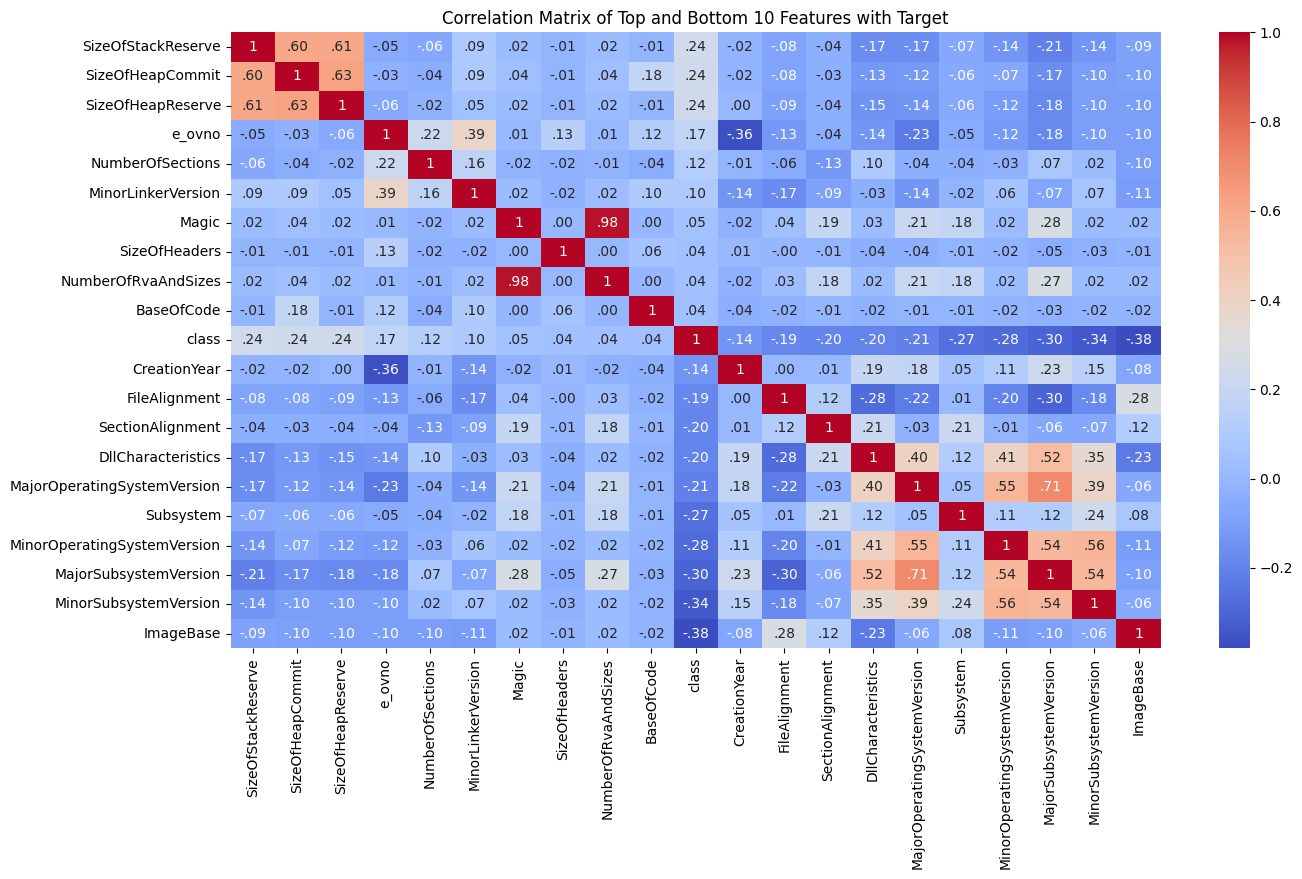

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'target' is your target column
target = 'class'

# Step 1: Drop columns with missing values
df_cleaned = df.dropna(axis=1)
df_cleaned = df_cleaned.drop(columns=["e_magic", "e_crlc"])

# Step 2: Check for remaining missing values (optional, for verification)
#print(df_cleaned.isna().sum())

# Step 3: Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Step 4: Get the 10 most and 10 least correlated features with the target
target_correlations = correlation_matrix[target].sort_values(ascending=False)

# Top 10 most correlated features
top_10_correlated = target_correlations[1:11]  # Exclude the target itself

# Add the target correlation back to the top 10
top_10_correlated = pd.concat([top_10_correlated, pd.Series([target_correlations[target]], index=[target])])

# Bottom 10 least correlated features
bottom_10_correlated = target_correlations[-10:]

# Step 5: Combine into a new DataFrame
df_new = pd.concat([top_10_correlated, bottom_10_correlated])

# Step 6: Plot the new correlation matrix
correlation_matrix_new = df_cleaned[df_new.index].corr()

# Custom formatting function
def format_annotation(val):
    if val == 1.0:
        return "1"  # Display 1.0 as 1
    elif val == -1.0:
        return "-1"  # Display -1.0 as -1
    elif val == 0.0:
        return "0"  # Display 0.0 as 0
    else:
        # Remove leading zero for decimals (e.g., 0.05 -> .05, -0.02 -> -.02)
        return f"{val:.2f}".replace("0.", ".").replace("-0.", "-.")

# Apply custom formatting to the correlation matrix
annot_matrix = correlation_matrix_new.applymap(format_annotation)

# Plot the heatmap with custom annotations
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix_new, annot=annot_matrix, fmt="", cmap='coolwarm')
plt.title('Correlation Matrix of Top and Bottom 10 Features with Target')
plt.show()

/var/folders/76/rnc3b19s2c3d8yj4hy6tjvkw0000gn/T/ipykernel_11488/227771715.py:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Correlation Value (Normalized)')  # Add a colorbar


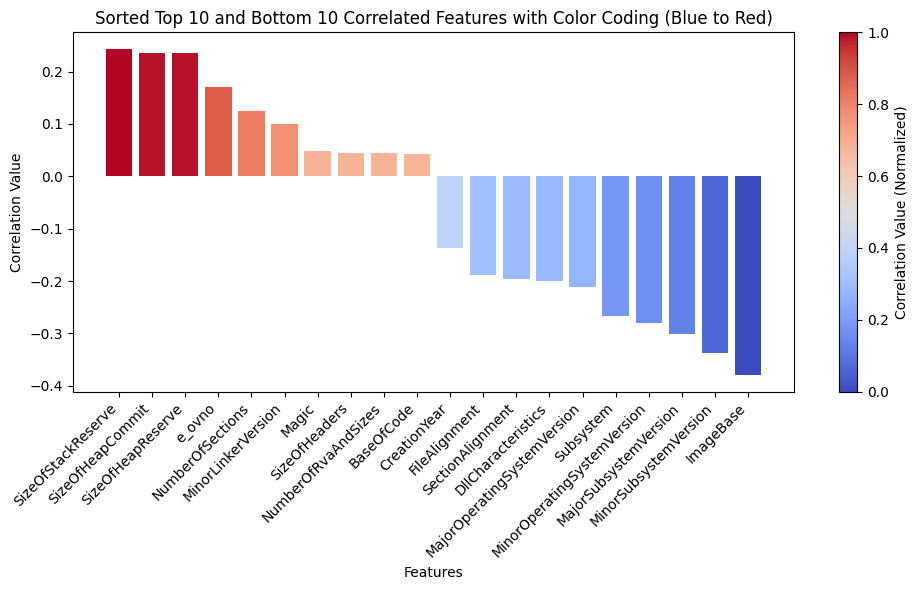

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df_cleaned' is your DataFrame and 'target' is your target column
target = 'class'

# Step 1: Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Step 2: Get the correlations with the target
target_correlations = correlation_matrix[target].sort_values(ascending=False)

# Top 10 most correlated features
top_10_correlated = target_correlations[1:11]  # Exclude the target itself

# Bottom 10 least correlated features
bottom_10_correlated = target_correlations[-10:]

# Combine the top and bottom correlated features
combined_correlations = pd.concat([top_10_correlated, bottom_10_correlated])

# Sort the combined correlations
sorted_correlations = combined_correlations.sort_values(ascending=False)

# Create a colormap from blue (-1) to red (1)
cmap = plt.get_cmap('coolwarm')

# Normalize the values to the range [0, 1] for colormap mapping
normalized_values = (sorted_correlations - sorted_correlations.min()) / (sorted_correlations.max() - sorted_correlations.min())

# Plot the sorted vector with color coding
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_correlations)), sorted_correlations, color=cmap(normalized_values))
plt.title('Sorted Top 10 and Bottom 10 Correlated Features with Color Coding (Red to Blue)')
plt.xlabel('Features')
plt.ylabel('Correlation Value')
plt.xticks(range(len(sorted_correlations)), sorted_correlations.index, rotation=45, ha='right')  # Add x-axis labels
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Correlation Value (Normalized)')  # Add a colorbar
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

In [58]:
normalized_values

SizeOfStackReserve             1.000000
SizeOfHeapCommit               0.986995
SizeOfHeapReserve              0.986044
e_ovno                         0.881689
NumberOfSections               0.809181
MinorLinkerVersion             0.768244
Magic                          0.685716
SizeOfHeaders                  0.680580
NumberOfRvaAndSizes            0.680004
BaseOfCode                     0.678976
CreationYear                   0.388244
FileAlignment                  0.307854
SectionAlignment               0.294386
DllCharacteristics             0.288698
MajorOperatingSystemVersion    0.269833
Subsystem                      0.182515
MinorOperatingSystemVersion    0.159567
MajorSubsystemVersion          0.127662
MinorSubsystemVersion          0.068067
ImageBase                      0.000000
Name: class, dtype: float64

* Now use the sorted_correlations to get the 2 first than the 3 first than the 4 first until having the entire 10.
* Now use the sorted_correlations to get the first and less and input them in a row matrix, than do the first, last and sefocon, intercalate them until fave a total of 10 features in a row.

* Input the results in a matrix.Plot both matrix side by side with corelation values normalized. this is showing the 2 method of how the feature selection where using. getting the heist corelation and the other one the high and low corelation.

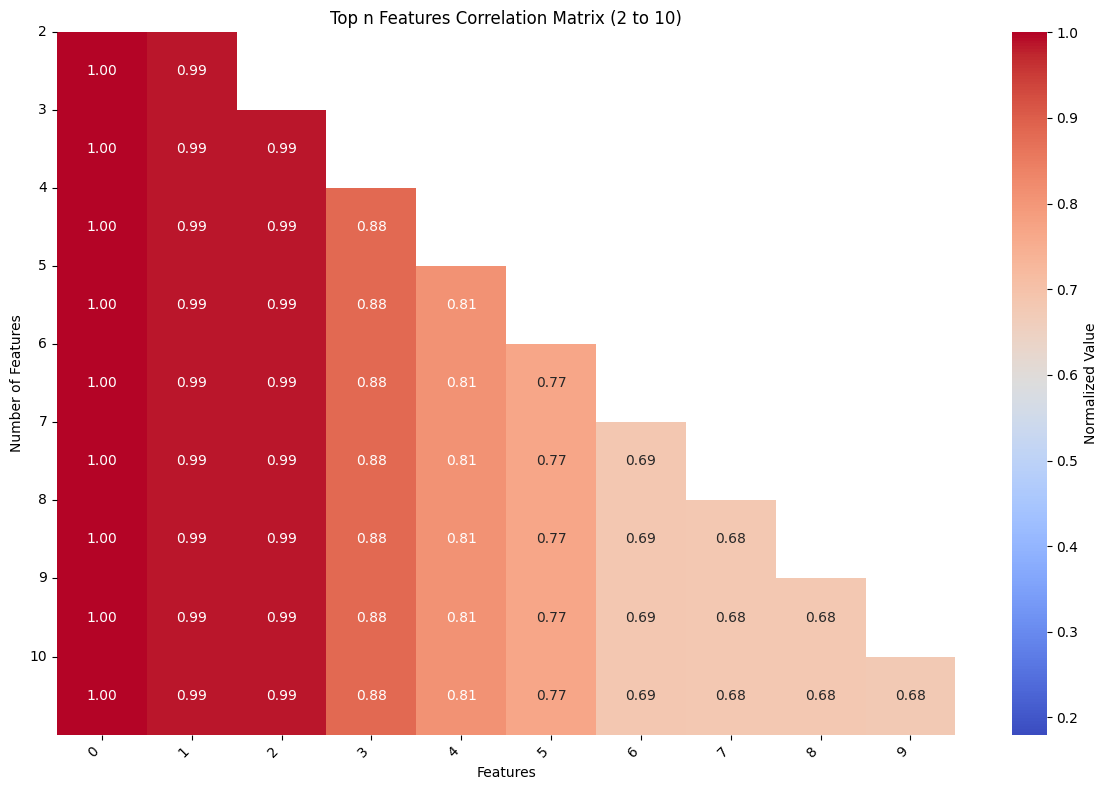

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'normalized_values' is your Series
normalized_values = pd.Series({
    'SizeOfStackReserve': 1.000000,
    'SizeOfHeapCommit': 0.986995,
    'SizeOfHeapReserve': 0.986044,
    'e_ovno': 0.881689,
    'NumberOfSections': 0.809181,
    'MinorLinkerVersion': 0.768244,
    'Magic': 0.685716,
    'SizeOfHeaders': 0.680580,
    'NumberOfRvaAndSizes': 0.680004,
    'BaseOfCode': 0.678976,
    'CreationYear': 0.388244,
    'FileAlignment': 0.307854,
    'SectionAlignment': 0.294386,
    'DllCharacteristics': 0.288698,
    'MajorOperatingSystemVersion': 0.269833,
    'Subsystem': 0.182515,
    'MinorOperatingSystemVersion': 0.159567,
    'MajorSubsystemVersion': 0.127662,
    'MinorSubsystemVersion': 0.068067,
    'ImageBase': 0.000000
})

# Step 1: Create method1_features as a list of dictionaries
method1_features = []
for n in range(2, 11):  # From 2 to 10
    top_n_features = normalized_values[:n]
    feature_dict = top_n_features.to_dict()  # Convert Series to dictionary
    method1_features.append(feature_dict)

# Step 2: Convert method1_features to a DataFrame for visualization
# Create a DataFrame with rows as the number of features (2 to 10) and columns as the feature names
max_features = 10  # Maximum number of features
feature_names = normalized_values.index.tolist()  # All feature names
data = np.full((len(method1_features), max_features), np.nan)  # Initialize with NaN

for i, feature_dict in enumerate(method1_features):
    for feature, value in feature_dict.items():
        data[i, feature_names.index(feature)] = value

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data, annot=True, fmt=".2f", cmap='coolwarm', vmin=0.18, vmax=1, cbar_kws={'label': 'Normalized Value'})
plt.title('Top n Features Correlation Matrix (2 to 10)')

# Customize y-axis labels to show 2 to 10
plt.yticks(np.arange(len(method1_features)), labels=np.arange(2, 11), rotation=0)  # Set y-axis labels to 2 to 10

plt.xlabel('Features')
plt.ylabel('Number of Features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

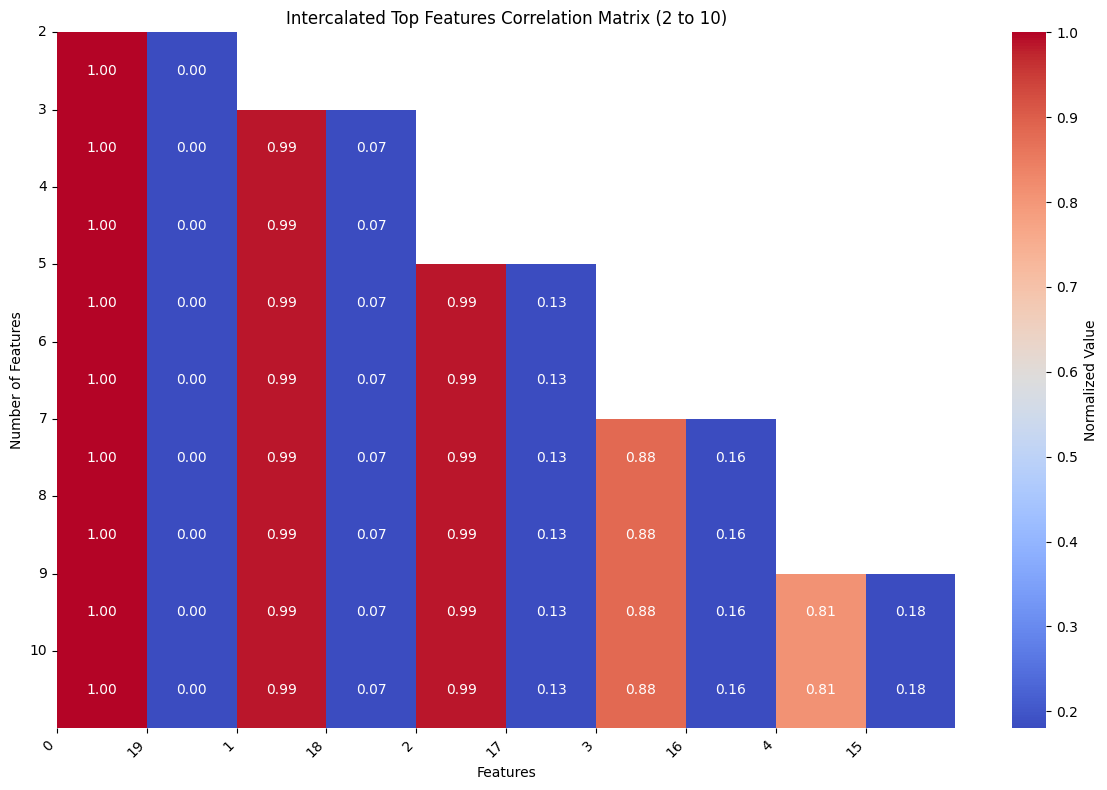

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'normalized_values' is your Series
normalized_values = pd.Series({
    'SizeOfStackReserve': 1.000000,
    'SizeOfHeapCommit': 0.986995,
    'SizeOfHeapReserve': 0.986044,
    'e_ovno': 0.881689,
    'NumberOfSections': 0.809181,
    'MinorLinkerVersion': 0.768244,
    'Magic': 0.685716,
    'SizeOfHeaders': 0.680580,
    'NumberOfRvaAndSizes': 0.680004,
    'BaseOfCode': 0.678976,
    'CreationYear': 0.388244,
    'FileAlignment': 0.307854,
    'SectionAlignment': 0.294386,
    'DllCharacteristics': 0.288698,
    'MajorOperatingSystemVersion': 0.269833,
    'Subsystem': 0.182515,
    'MinorOperatingSystemVersion': 0.159567,
    'MajorSubsystemVersion': 0.127662,
    'MinorSubsystemVersion': 0.068067,
    'ImageBase': 0.000000
})

# Step 1: Sort features by normalized values (highest to lowest)
sorted_features = normalized_values.sort_values(ascending=False)

# Step 2: Intercalate highest and lowest values
def intercalate_features(sorted_series, num_features=10):
    """Intercalates highest and lowest correlation features into a balanced selection."""
    intercalated_features = []
    left, right = 0, len(sorted_series) - 1  # Pointers for highest and lowest

    while len(intercalated_features) < num_features:
        if left < right:
            intercalated_features.append(sorted_series.index[left])  # Highest available
            intercalated_features.append(sorted_series.index[right])  # Lowest available
            left += 1
            right -= 1
        elif left == right and len(intercalated_features) < num_features:
            intercalated_features.append(sorted_series.index[left])  # Middle element if odd
        
    return intercalated_features

# Step 3: Create a row matrix with intercalated features
method1_features = []
for n in range(2, 11):  # From 2 to 10
    selected_features = intercalate_features(sorted_features, num_features=n)
    feature_dict = {feature: normalized_values[feature] for feature in selected_features}
    method1_features.append(feature_dict)

# Step 4: Convert method1_features to a DataFrame for visualization
max_features = 10  # Maximum number of features per row
feature_list = sorted_features.index[:max_features]  # Ensure max 10 feature names
data = np.full((len(method1_features), max_features), np.nan)  # Initialize with NaN

for i, feature_dict in enumerate(method1_features):
    for j, feature in enumerate(feature_dict.keys()):
        if j < max_features:  # Prevent IndexError
            data[i, j] = feature_dict[feature]
feature_list_=[0,19,1,18,2,17,3,16,4,15]
# Step 5: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data, annot=True, fmt=".2f", cmap='coolwarm', vmin=0.18, vmax=1, cbar_kws={'label': 'Normalized Value'})
plt.title('Intercalated Top Features Correlation Matrix (2 to 10)')

# Customize y-axis labels to show 2 to 10
plt.yticks(np.arange(len(method1_features)), labels=np.arange(2, 11), rotation=0)  # Set y-axis labels to 2 to 10

plt.xlabel('Features')
plt.ylabel('Number of Features')
#plt.xticks(np.arange(max_features), feature_list, rotation=45, ha='right')  # Rotate x-axis labels for better readability
#plt.xticks(np.arange(max_features), np.arange(1, max_features + 1), rotation=0)
plt.xticks(np.arange(max_features), feature_list_, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Dataset

In [63]:
class ClaMPDatasetGPT(): # 4 features -> most and least correlated atributs
    def __init__(self, target, cut=0):
        self.target = target
        self.X, self.y, self.correlation_matrix = self.read_csv(cut)
        self.list_atributs = self.list_atributs_correlation()

    def list_atributs_correlation(self):
        # Calculate the correlation of each feature with the target variable
        target_correlation = self.X.corrwith(self.y).abs()
        
        # Sort the features based on their absolute correlation with the target
        sorted_correlation = target_correlation.sort_values(ascending=False)
        
        # Select the top n features with the highest correlation
        top_n = 15  # You can adjust this number as needed
        top_correlated = sorted_correlation.head(top_n).index.tolist()
        
        # Select the top n features with the lowest correlation
        bottom_correlated = sorted_correlation.tail(top_n).index.tolist()
        
        # Combine the lists
        list_atributs = top_correlated + bottom_correlated
        
        return list_atributs

    def read_csv(self, cut):
        # Define the dataset path
        dataset_path = "/Users/sthefaniepasso/.cache/kagglehub/datasets/saurabhshahane/classification-of-malwares/versions/1"

        # List files in the directory to find the CSV file
        files = os.listdir(dataset_path)
        csv_files = [f for f in files if f.endswith('.csv')]

        # Load the first CSV file (assuming there's only one)
        if csv_files:
            df = pd.read_csv(os.path.join(dataset_path, csv_files[0]))
            #print("CSV found and send to df")  # Display first few rows
        else:
            print("No CSV file found in the dataset directory.")
        
        # Drop columns with NaN values
        df = df.dropna(axis=1)
        # Apply the cut if specified
        df = self.create_cut(df, cut)
        
        # Separate features and target
        y = df[self.target]
        X = df.drop(columns=[self.target])
        
        # Calculate the correlation matrix
        correlation_matrix = X.corr()
        
        return X, y, correlation_matrix

    def create_cut(self, df, cut=0):
        if cut == 0:
            return df

        # Select the rows where Class is 0 and 1
        class_0 = df[df[self.target] == 0]
        class_1 = df[df[self.target] == 1]
        
        # Select based on the condition of cut % 2 == 0 or cut % 2 == 1
        if cut % 2 == 0:
            df_n = pd.concat([class_0[:cut//2], class_1[:cut//2]])
        else:
            df_n = pd.concat([class_0[:(cut//2)+1], class_1[:cut//2]])

        return df_n

    def plot_correlation_matrix(self):
        # Plot the correlation matrix using seaborn
        plt.figure(figsize=(15, 8))
        sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix')
        plt.show()

    def stratified_ordered_split(self, X_dim, test_size=0.2):
        # Ensure index alignment
        X_class_0 = X_dim.loc[self.y[self.y == 0].index]
        X_class_1 = X_dim.loc[self.y[self.y == 1].index]
        y_class_0 = self.y[self.y == 0]
        y_class_1 = self.y[self.y == 1]

        # Split each class separately
        X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(
            X_class_0, y_class_0, test_size=test_size, shuffle=False
        )
        X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
            X_class_1, y_class_1, test_size=test_size, shuffle=False
        )

        # Concatenate to maintain order
        X_train = np.vstack((X_train_0, X_train_1))
        X_test = np.vstack((X_test_0, X_test_1))
        y_train = np.hstack((y_train_0, y_train_1))
        y_test = np.hstack((y_test_0, y_test_1))

        return X_train, X_test, y_train, y_test

    def dataset(self, dimension):
        list_atributs = self.list_atributs
        X_dim = self.X[list_atributs[:dimension]]
        X_train, X_test, y_train, y_test = self.stratified_ordered_split(X_dim, test_size=0.2)
        #X_train, X_test, y_train, y_test = self.stratified_ordered_split(X_dim, self.y, test_size=0.2)
        #print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
        return X_train, X_test, y_train, y_test

In [53]:
class ClaMPDataset(): # 4 features -> most corelated atributs
  def __init__(self, target, cut = 0):
    self.target = target
    self.X, self.y, self.correlation_matrix = self.read_csv(cut)
    self.list_atributs = self.list_atributs_corralation()

  def list_atributs_corralation(self):
    # Unstack the correlation matrix to get pair-wise correlations as a series
    correlation_series = self.correlation_matrix.unstack()
    # Convert the series to a DataFrame for better manipulation
    correlation_df = pd.DataFrame(correlation_series, columns=['correlation']).reset_index()
    # Rename the columns for clarity
    correlation_df.columns = ['attribute_1', 'attribute_2', 'correlation']
    # Filter out self-correlations (where correlation == 1)
    correlation_df = correlation_df[correlation_df['attribute_1'] != correlation_df['attribute_2']]
    # Sort the correlation values from highest to lowest
    sorted_correlation_df = correlation_df.sort_values(by='correlation', ascending=False)
    # List to store the final results without repeated attributes
    top_correlations = []
    list_atributs = []
    used_attributes = set()
    for _, row in sorted_correlation_df.iterrows():
        if len(top_correlations) >= 8:
            break
        attr1, attr2, corr_value = row['attribute_1'], row['attribute_2'], row['correlation']
        if attr1 not in used_attributes and attr2 not in used_attributes:
            top_correlations.append((attr1, attr2, corr_value))
            list_atributs.append(attr1)
            list_atributs.append(attr2)
            used_attributes.add(attr1)
            used_attributes.add(attr2)
    return list_atributs

  def read_csv(self, cut):
    # Define the dataset path
    dataset_path = "/Users/sthefaniepasso/.cache/kagglehub/datasets/saurabhshahane/classification-of-malwares/versions/1"

    # List files in the directory to find the CSV file
    files = os.listdir(dataset_path)
    csv_files = [f for f in files if f.endswith('.csv')]

    # Load the first CSV file (assuming there's only one)
    if csv_files:
        df = pd.read_csv(os.path.join(dataset_path, csv_files[0]))
        #print("CSV found and send to df")  # Display first few rows
    else:
        print("No CSV file found in the dataset directory.")
    #df.dropna(axis=1, inplace=True)
    df = df.dropna(axis=1)
    df = self.create_cut(df, cut)
    y = df[self.target]
    X = df.drop(columns=[self.target])
    correlation_matrix = X.corr()
    return X,y,correlation_matrix

  def create_cut(self, df, cut=0):
    if cut == 0:
        return df

    # Select the rows where Class is 0 and 1
    class_0 = df[df[self.target] == 0]
    class_1 = df[df[self.target] == 1]
    
    # Select based on the condition of cut % 2 == 0 or cut % 2 == 1
    if cut % 2 == 0:
      df_n = pd.concat([class_0[:cut//2], class_1[:cut//2]])
    else:
      df_n = pd.concat([class_0[:(cut//2)+1], class_1[:cut//2]])
    return df_n

  def plot_correlation_matrix(self):
    # Plot the correlation matrix using seaborn
    plt.figure(figsize=(15, 8))
    sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

  def stratified_ordered_split(self, X_dim, test_size=0.2):
    # Ensure index alignment
    X_class_0 = X_dim.loc[self.y[self.y == 0].index]
    X_class_1 = X_dim.loc[self.y[self.y == 1].index]
    y_class_0 = self.y[self.y == 0]
    y_class_1 = self.y[self.y == 1]

    # Split each class separately
    X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(
        X_class_0, y_class_0, test_size=test_size, shuffle=False
    )
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
        X_class_1, y_class_1, test_size=test_size, shuffle=False
    )

    # Concatenate to maintain order
    X_train = np.vstack((X_train_0, X_train_1))
    X_test = np.vstack((X_test_0, X_test_1))
    y_train = np.hstack((y_train_0, y_train_1))
    y_test = np.hstack((y_test_0, y_test_1))

    return X_train, X_test, y_train, y_test

  def dataset(self, dimension):
    list_atributs = self.list_atributs
    X_dim = self.X[list_atributs[:dimension]]
    X_train, X_test, y_train, y_test = self.stratified_ordered_split(X_dim, test_size=0.2)
    #X_train, X_test, y_train, y_test = self.stratified_ordered_split(X_dim, self.y, test_size=0.2)
    #print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    return X_train, X_test, y_train, y_test

# QSVC

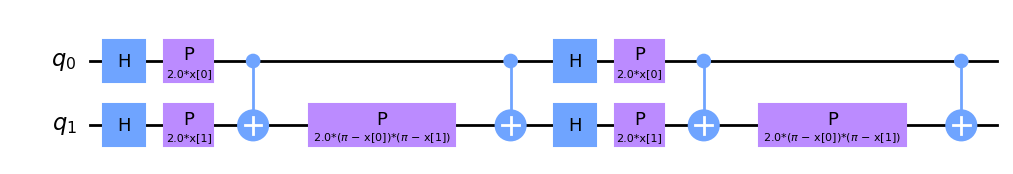

In [21]:
from qiskit.circuit.library import ZZFeatureMap
import pylatexenc

num_features = 2

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)

#quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

# Transpile quantum kernel for the local backend
feature_map_compiled = transpile(feature_map)
feature_map_compiled.decompose().draw(output="mpl", style="clifford", fold=20)

In [18]:
print(feature_map_compiled.decompose())

     ┌───┐┌─────────────┐                                          ┌───┐»
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■──┤ H ├»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└─────────────┘└───┘└──────────────────────────────┘└───┘└───┘»
«     ┌─────────────┐                                          
«q_0: ┤ P(2.0*x[0]) ├──■────────────────────────────────────■──
«     ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐
«q_1: ┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └─────────────┘└───┘└──────────────────────────────┘└───┘


In [ ]:
# To send to a quantum computer
number_qubits = 127 #if name != 'ibm_torino' else 133
quantum_kernel_circuit = QuantumCircuit(number_qubits)#num_features+1)
quantum_kernel_circuit.append(feature_map_compiled, range(2))

fidelity_quantum_kernel = FidelityQuantumKernel()
fidelity_quantum_kernel._quantum_circuit = quantum_kernel_circuit

quantum_kernel_circuit.draw(output="mpl", style="clifford", fold=20)

In [ ]:
# Classification with QSVC using the quantum kernel circuit
qsvc = QSVC(quantum_kernel=fidelity_quantum_kernel)
# Train QSVC
qsvc.fit(X_train, y_train)
# Test QSVC
score = qsvc.score(X_test, y_test)
#print(f"Callable kernel classification test score: {score}")
# #return qsvc, backend

### SVC + Kernel

In [78]:
def plot_kernel(matrix_train, matrix_test):
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))

    axs[0].imshow(
        np.asmatrix(matrix_train), interpolation="nearest", origin="upper", cmap="Greens"
    )
    axs[0].set_title("ClamMP training kernel matrix")

    axs[1].imshow(np.asmatrix(matrix_test), interpolation="nearest", origin="upper", cmap="Greens")
    axs[1].set_title("ClamMP testing kernel matrix")

    plt.show()

In [24]:
def svc_qkernel(name, X_train, y_train, X_test, y_test, dimension, service):
    # backend = service.backend(name)
    # sampler = Sampler(backend)
    
    # QSVC setup
    num_features = dimension  # Number of features
    feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
    ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
    
    # Quantum Kernel setup
    quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)
    # Transpile quantum kernel for the backend
    feature_map_compiled = transpile(feature_map)#, backend=backend)
    # Evaluate the quantum kernel matrices
    X_matrix_train = quantum_kernel.evaluate(x_vec=X_train)
    X_matrix_test = quantum_kernel.evaluate(x_vec=X_test, y_vec=X_train)

    # # SVC model with precomputed kernel
    # svc_qkernel_model = SVC(kernel="precomputed")
    # print("Kernel shape:", X_matrix_train.shape)
    # svc_qkernel_model.fit(X_matrix_train, y_train)
    
    # # Evaluate the model
    # adhoc_score_precomputed_kernel = svc_qkernel_model.score(X_matrix_test, y_test)
    # print(f"Precomputed kernel classification test score: {adhoc_score_precomputed_kernel}")
    return X_matrix_train, X_matrix_test

Shape:  (414, 2) (104, 2) (414,) (104,)
[0 0 0 0 0 0 0 0 0 0] [1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0] [1 1 1 1 1 1 1 1 1 1]


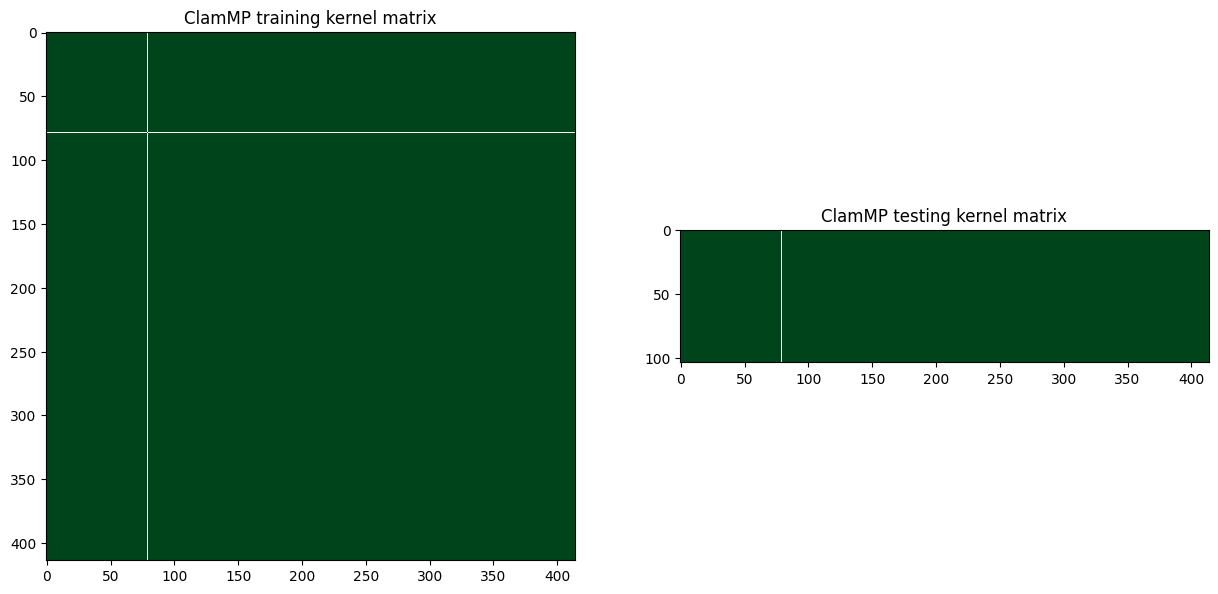

In [79]:
samples = 518
dimension = 2
malware = ClaMPDataset(target='class', cut=samples)
X_train, X_test, y_train, y_test = malware.dataset(dimension)
print("Shape: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

matrix_train, matrix_test= svc_qkernel("ibm_brisbine", X_train, y_train, X_test, y_test, samples, "None")
print(y_train[:10], y_train[-10:])
print(y_test[:10], y_test[-10:])
plot_kernel(matrix_train, matrix_test)

/Users/sthefaniepasso/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/sthefaniepasso/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Shape:  (414, 2) (104, 2) (414,) (104,)


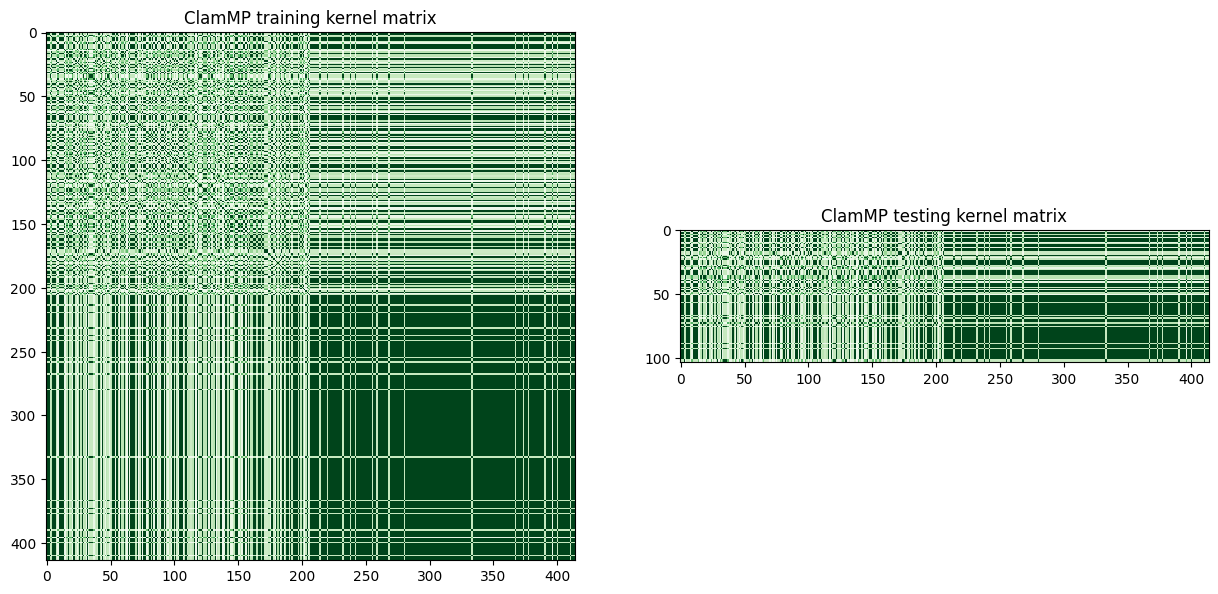

In [80]:
#complete the code ...
samples = 518
dimension = 2
malware = ClaMPDatasetGPT(target='class', cut=samples)
X_train, X_test, y_train, y_test = malware.dataset(dimension)
print("Shape: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

matrix_train, matrix_test= svc_qkernel("ibm_brisbine", X_train, y_train, X_test, y_test, samples, "None")
plot_kernel(matrix_train, matrix_test)

### SVC + RBF

Shape:  (414, 2) (104, 2) (414,) (104,)
Accuracy of SVC with precomputed RBF kernel: 0.50


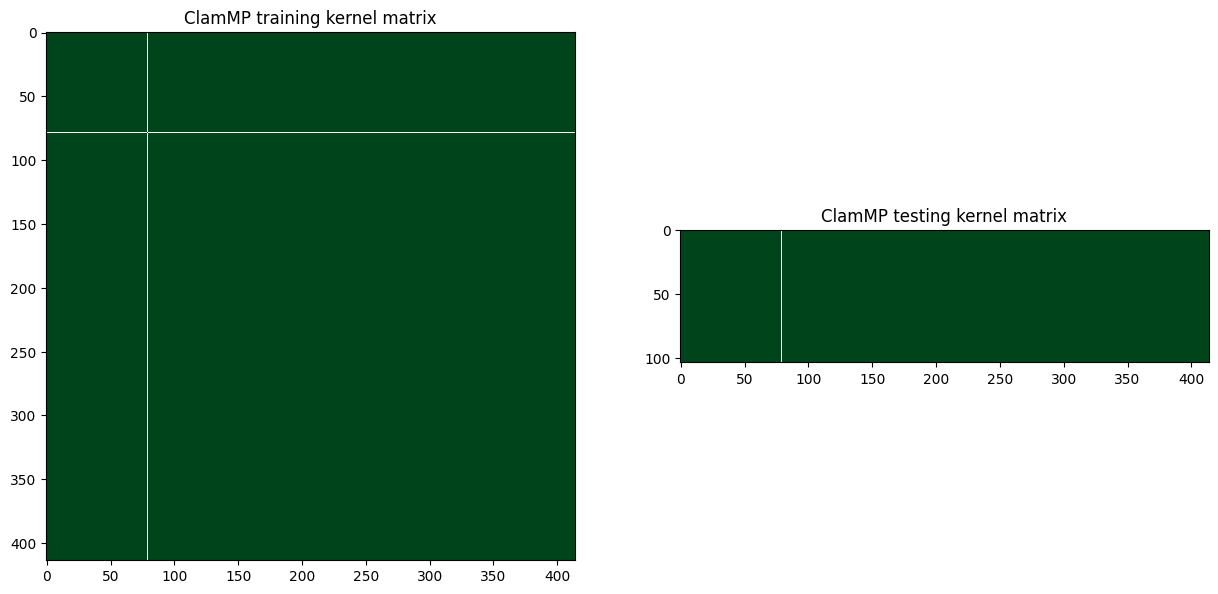

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=5, random_state=42)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test
#complete the code ...
samples = 518
dimension = 2
malware = ClaMPDataset(target='class', cut=samples)
X_train, X_test, y_train, y_test = malware.dataset(dimension)
print("Shape: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Compute the RBF kernel matrices
gamma = 0.5  # Kernel coefficient
K_train = rbf_kernel(X_train, X_train, gamma=gamma)
K_test = rbf_kernel(X_test, X_train, gamma=gamma)  # Use training data for comparison

# Train SVC with precomputed kernel
svc = SVC(kernel="precomputed")
svc.fit(K_train, y_train)

# Make predictions
y_pred = svc.predict(K_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVC with precomputed RBF kernel: {accuracy:.2f}")

# Plot the RBF kernel matrix
plot_kernel(K_train, K_test)

/Users/sthefaniepasso/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/sthefaniepasso/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Shape:  (414, 2) (104, 2) (414,) (104,)
Accuracy of SVC with precomputed RBF kernel: 0.66


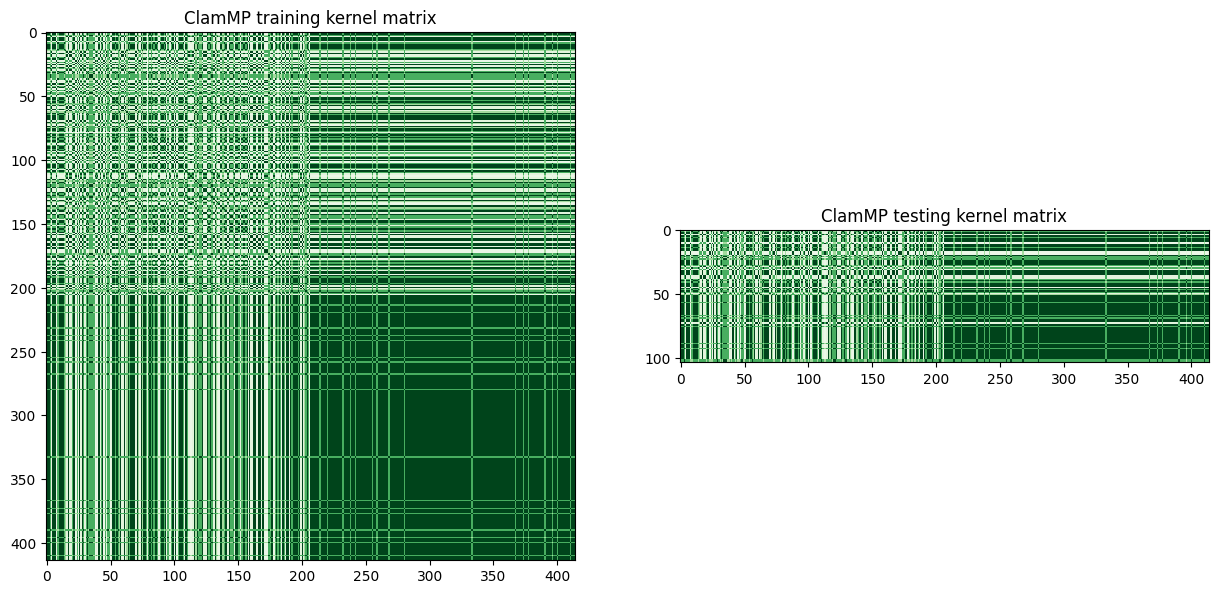

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=5, random_state=42)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test
samples = 518
dimension = 2
malware = ClaMPDatasetGPT(target='class', cut=samples)
X_train, X_test, y_train, y_test = malware.dataset(dimension)
print("Shape: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Compute the RBF kernel matrices
gamma = 0.5  # Kernel coefficient
K_train = rbf_kernel(X_train, X_train, gamma=gamma)
K_test = rbf_kernel(X_test, X_train, gamma=gamma)  # Use training data for comparison

# Train SVC with precomputed kernel
svc = SVC(kernel="precomputed")
svc.fit(K_train, y_train)

# Make predictions
y_pred = svc.predict(K_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVC with precomputed RBF kernel: {accuracy:.2f}")

# Plot the RBF kernel matrix
plot_kernel(K_train, K_test)

# Results

In [5]:
def read_csv_files(name_file):
    df = pd.read_csv(name_file)
    #Model
    if ("qsvc" in name_file):
        df["Model"] = "qsvc"
    elif ("svc_qkernel" in name_file):
        df["Model"] = "qkernel"
    else:
        df["Model"] = "svc"
    #Type of correlation
    if ("10_0" in name_file):
        df["Correlation"] = "High vs Low"
    else:
        df["Correlation"] = "High vs High"
    return df


In [54]:
# Name of .csv files
file_path = ['results/qsvc_results_correlation_10_0.csv', 'results/qsvc_results_correlation_10_10.csv', 'results/svc_qkernel_results_correlation_10_0.csv',
             'results/svc_qkernel_results_correlation_10_10.csv', 'results/svc_results_correlation_10_0.csv', 'results/svc_results_correlation_10_10.csv']
list_dfs = []
# Read csv and input in a df
for i in file_path:
    df = read_csv_files(i)
    #print(df)    
    #concatenate new df in every loop
    list_dfs.append(df)
dfs = pd.concat(list_dfs, ignore_index=True)

# Display DataFrame info
dfs.info()
dfs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hardware               20 non-null     object 
 1   Dimension              400 non-null    float64
 2   TP                     400 non-null    float64
 3   TN                     400 non-null    float64
 4   FP                     400 non-null    float64
 5   FN                     400 non-null    float64
 6   Accuracy               400 non-null    float64
 7   Precision              400 non-null    float64
 8   Sensitivity            400 non-null    float64
 9   Specificity            400 non-null    float64
 10  F1 Score               400 non-null    float64
 11  Elapsed Time (s)       400 non-null    float64
 12  Usage (s)              400 non-null    float64
 13  Estimated Usage (s)    0 non-null      float64
 14  Num Qubits             20 non-null     float64
 15  Median

Hardware  Dimension    TP    TN    FP   FN  Accuracy  Precision  \
0  ibm_brisbane        2.0  50.0  23.0  23.0  4.0      0.73   0.684932   
1  ibm_brisbane        3.0  47.0  37.0   9.0  7.0      0.84   0.839286   
2  ibm_brisbane        4.0  50.0  37.0   9.0  4.0      0.87   0.847458   
3  ibm_brisbane        5.0  49.0  41.0   5.0  5.0      0.90   0.907407   
4  ibm_brisbane        6.0  48.0  41.0   5.0  6.0      0.89   0.905660   

   Sensitivity  Specificity  ...  Elapsed Time (s)  Usage (s)  \
0     0.925926     0.500000  ...        134.351588   4.912659   
1     0.870370     0.804348  ...        229.266037   4.912659   
2     0.925926     0.804348  ...        371.324591   4.912659   
3     0.907407     0.891304  ...        559.153399   4.912659   
4     0.888889     0.891304  ...        795.377759   4.912659   

   Estimated Usage (s)  Num Qubits  Median T1  Median T2  \
0                  NaN       127.0   0.000062   0.000062   
1                  NaN       127.0   0.000062   0.000062   
2                  NaN       127.0   0.000062   0.000062   
3                  NaN       127.0   0.000062   0.000062   
4                  NaN       127.0   0.000062   0.000062   

   Median Read Out Error  Model  Correlation Samples  
0               0.030625   qsvc  High vs Low     NaN  
1               0.030625   qsvc  High vs Low     NaN  
2               0.030625   qsvc  High vs Low     NaN  
3               0.030625   qsvc  High vs Low     NaN  
4               0.030625   qsvc  High vs Low     NaN  

[5 rows x 21 columns]

### Plot Accuracy vs Dimension for all models to ne compared.

In [102]:

def plot_parameter(parameter="Accuracy", start_dim = 2, end_dim = 11):
    # Define models and correlations
    models = ['svc', 'qkernel', 'qsvc']
    correlations = ['High vs High', 'High vs Low']

    # Generate color mapping from tab20
    base_colors = cm.tab20.colors  # 20 distinct colors from the colormap
    color_mapping = {}

    # Assign unique colors to each (model, correlation) pair
    for i, (model, correlation) in enumerate([(m, c) for m in models for c in correlations]):
        base_color = base_colors[i % len(base_colors)]  # Cycle through colors
        color_mapping[(model, correlation)] = mcolors.to_rgba(base_color, alpha=1.0)  # Solid color

    # Create figure
    plt.figure(figsize=(10, 6))

    # Loop through each model and correlation to plot
    for model in models:
        for correlation in correlations:
            df_filtered = dfs[(dfs['Model'] == model) & (dfs['Correlation'] == correlation)]
            df_filtered = df_filtered[(df_filtered['Dimension'] >= 2) & (df_filtered['Dimension'] <= 11)]

            accuracy = df_filtered[parameter]
            dimension = df_filtered['Dimension']

            # Assign linestyle
            linestyle_plot = ":" if model == 'svc' else "-" if model == 'qkernel' else "--"

            # Use assigned color
            plt.plot(dimension, accuracy, marker='o', linestyle=linestyle_plot, 
                    linewidth=1.5, color=color_mapping[(model, correlation)], 
                    label=f'{model} - {correlation}')

    # Customize the plot
    plt.xlabel('Dimension')
    plt.ylabel(parameter)
    plt.title(parameter+'vs Dimension for Different Models and Correlations')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()

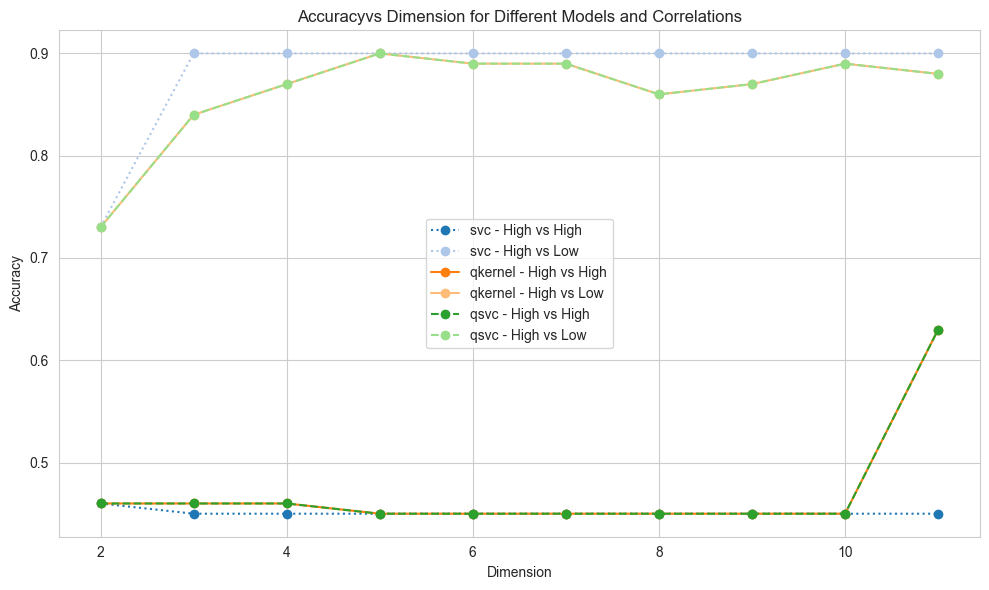

In [103]:
plot_parameter()

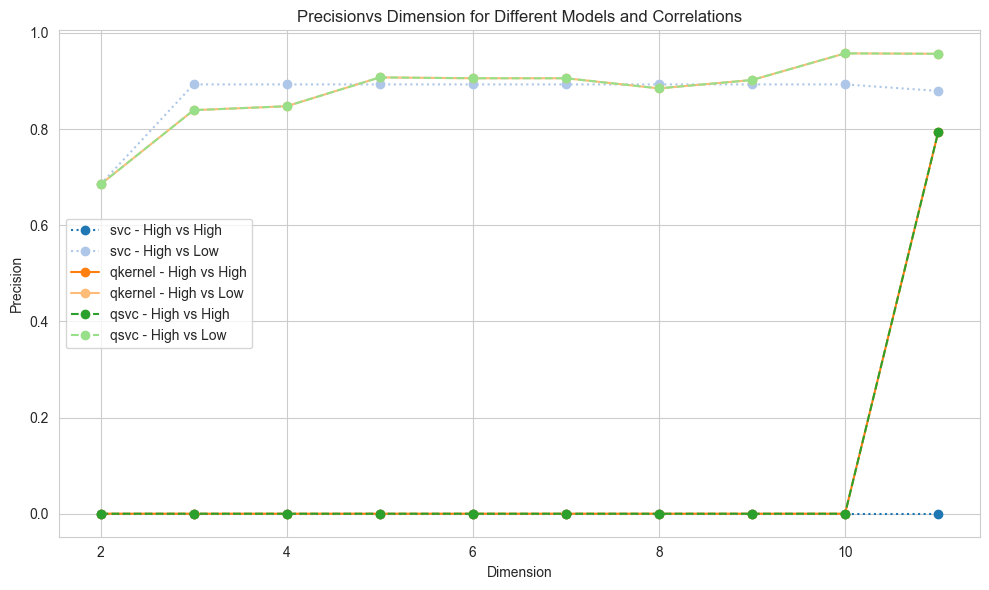

In [104]:
plot_parameter(parameter="Precision")

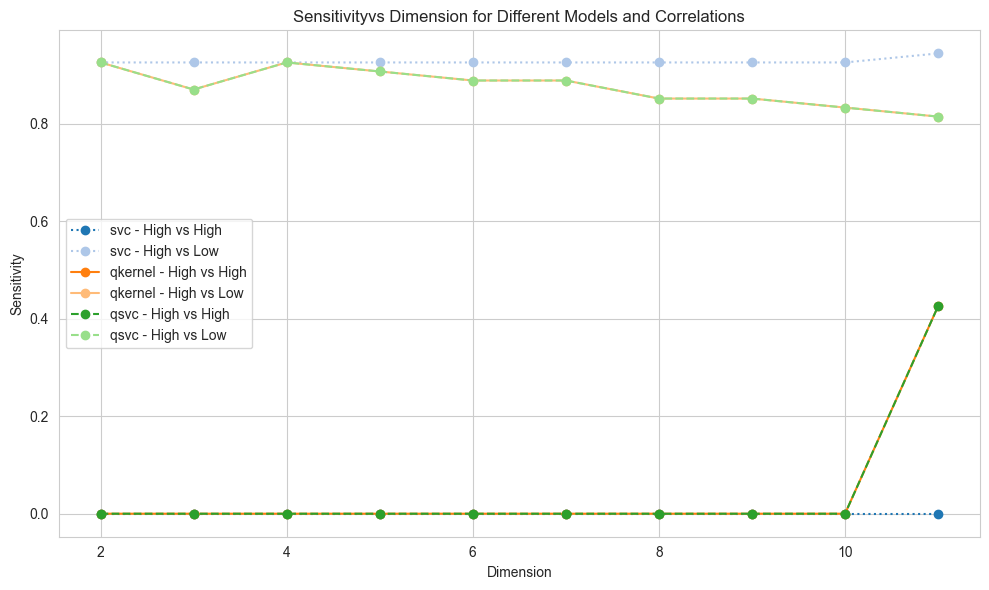

In [105]:
plot_parameter(parameter="Sensitivity")

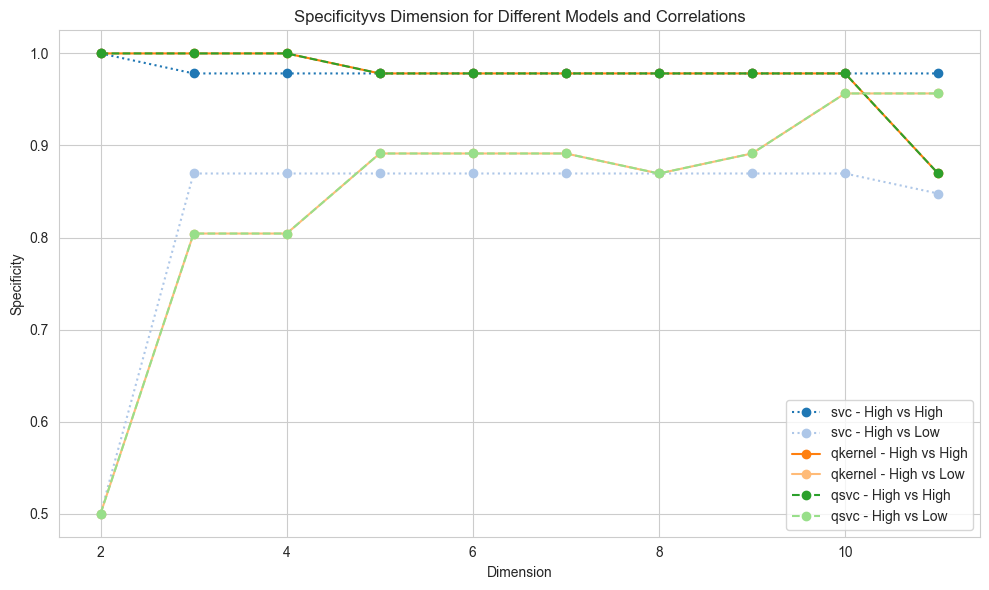

In [106]:
plot_parameter(parameter="Specificity")

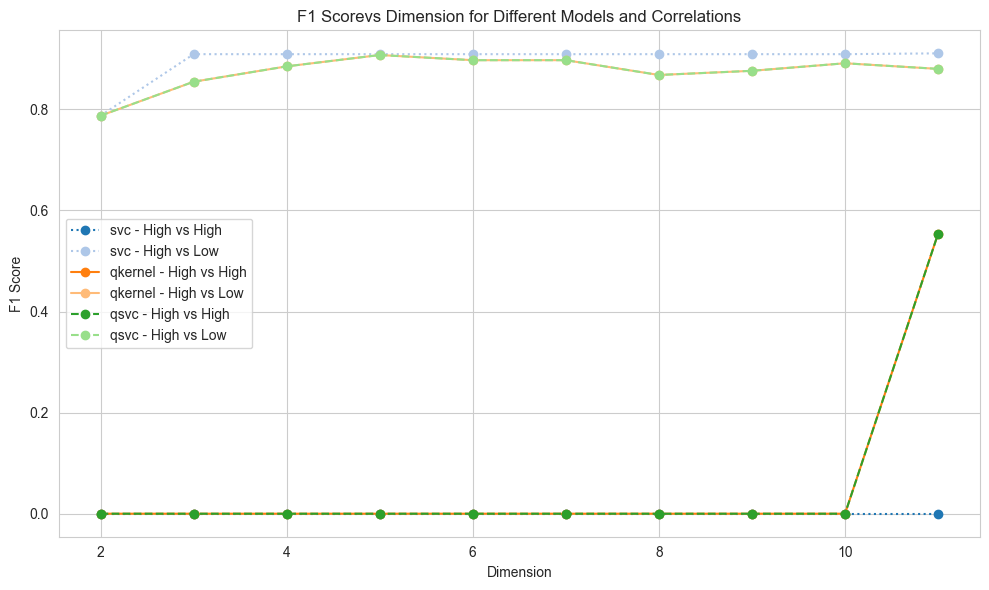

In [107]:
plot_parameter(parameter="F1 Score")

# Model Performance

In [83]:
def bar_grafic_10_100_dataset(df1, df2):
    # Get unique sample sizes for both datasets
    sample_sizes = sorted(df1['Samples'].unique())  
    num_plots = len(sample_sizes)  

    # Create figure with two columns (one for each dataset)
    fig, axes = plt.subplots(num_plots, 2, figsize=(14, 6*num_plots))
    fig.tight_layout(pad=5.0)

    # Plot each sample size
    for i, samples in enumerate(sample_sizes):
        # Filter data for current sample size and dimensions 1-10
        df1_samples = df1[(df1['Samples'] == samples) & (df1['Dimension'] <= 10)]
        df2_samples = df2[(df2['Samples'] == samples) & (df2['Dimension'] <= 10)]
        
        # Left column - First dataset (red)
        ax1 = axes[i, 0] if num_plots > 1 else axes[0]
        
        # Get best and worst precision rows
        df1_best = df1_samples.loc[df1_samples['Precision'].idxmax()]
        df1_worst = df1_samples.loc[df1_samples['Precision'].idxmin()]
        
        # Metrics to plot
        metrics = ['Precision', 'Accuracy', 'F1 Score']
        x = np.arange(len(metrics))
        width = 0.35
        
        # Plot best metrics
        bars1 = ax1.bar(x - width/2, df1_best[metrics], width, 
                    color='blue', label=f'Best {df1_best["Dimension"]}D')
        # Plot worst metrics
        bars2 = ax1.bar(x + width/2, df1_worst[metrics], width, 
                    color='darkblue', label=f'Worst {df1_worst["Dimension"]}D')
        
        ax1.set_xlabel('Metrics')
        ax1.set_ylabel('Score')
        # ax1.set_title(f'Dataset 1 - Samples = {samples}')
        ax1.set_xticks(x)
        ax1.set_xticklabels(metrics)
        ax1.set_ylim(0, 1.1)
        ax1.legend()
        
        # Right column - Second dataset (blue)
        ax2 = axes[i, 1] if num_plots > 1 else axes[1]
        
        # Get best and worst precision rows
        df2_best = df2_samples.loc[df2_samples['Precision'].idxmax()]
        df2_worst = df2_samples.loc[df2_samples['Precision'].idxmin()]
        
        # Plot best metrics
        bars3 = ax2.bar(x - width/2, df2_best[metrics], width, 
                    color='red', label=f'Best {df2_best["Dimension"]}D')
        # Plot worst metrics
        bars4 = ax2.bar(x + width/2, df2_worst[metrics], width, 
                    color='darkred', label=f'Worst {df2_worst["Dimension"]}D')
        
        ax2.set_xlabel('Metrics')
        ax2.set_ylabel('Score')
        # ax2.set_title(f'Dataset 2 - Samples = {samples}')
        ax2.set_xticks(x)
        ax2.set_xticklabels(metrics)
        ax2.set_ylim(0, 1.1)
        ax2.legend()
        
        # Add value labels on top of bars
        for ax in [ax1, ax2]:
            for bar in ax.patches:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.2f}',
                        ha='center', va='bottom')
    plt.show()

In [84]:
def line_graph_10_100_dataset(df1, df2, df3, df4, df5, df6):
    # Get unique sample sizes (assuming all dfs have same sample sizes)
    sample_sizes = sorted(df1['Samples'].unique())
    
    # Create figure with 6 columns (one for each dataset pair)
    fig, axes = plt.subplots(len(sample_sizes), 6, figsize=(30, 6*len(sample_sizes)))
    fig.tight_layout(pad=5.0)

    # Plot each sample size
    for i, samples in enumerate(sample_sizes):
        # Process each dataframe pair
        for col, (df_a, df_b, color) in enumerate([(df1, df2, 'red'), 
                                                 (df3, df4, 'green'), 
                                                 (df5, df6, 'blue')]):
            # Filter data
            df_a_samples = df_a[(df_a['Samples'] == samples) & (df_a['Dimension'] <= 10)]
            df_b_samples = df_b[(df_b['Samples'] == samples) & (df_b['Dimension'] <= 10)]
            
            # Left plot of pair
            ax_a = axes[i, col*2] if len(sample_sizes) > 1 else axes[col*2]
            line_a, = ax_a.plot(df_a_samples['Dimension'], df_a_samples['Precision'],
                              marker='o', color=color)
            
            best_dim_a = df_a_samples.loc[df_a_samples['Precision'].idxmax(), 'Dimension']
            best_prec_a = df_a_samples['Precision'].max()
            
            mark_a = ax_a.scatter(best_dim_a, best_prec_a, color='black', marker='x', s=100)
            
            ax_a.legend([line_a, mark_a],
                      [f'Samples = {samples}', f'Best = {best_dim_a}D'],
                      loc='upper right')
            
            ax_a.set_xlabel('Dimensions')
            ax_a.set_ylabel('Precision')
            ax_a.set_ylim(-0.1, 1.1)
            ax_a.set_xticks(range(2, 11, 2))
            ax_a.set_xticklabels([f'{d}D' for d in range(2, 11, 2)])
            ax_a.set_xlim(1.9, 10.1)
            ax_a.grid(True)
            
            # Right plot of pair
            ax_b = axes[i, col*2+1] if len(sample_sizes) > 1 else axes[col*2+1]
            line_b, = ax_b.plot(df_b_samples['Dimension'], df_b_samples['Precision'],
                              marker='s', color=color)
            
            best_dim_b = df_b_samples.loc[df_b_samples['Precision'].idxmax(), 'Dimension']
            best_prec_b = df_b_samples['Precision'].max()
            
            mark_b = ax_b.scatter(best_dim_b, best_prec_b, color='black', marker='x', s=100)
            
            ax_b.legend([line_b, mark_b],
                      [f'Samples = {samples}', f'Best = {best_dim_b}D'], 
                      loc='upper left')
            
            ax_b.set_xlabel('Dimensions')
            ax_b.set_ylabel('Precision')
            ax_b.set_ylim(-0.1, 1.1)
            ax_b.set_xticks(range(2, 11, 2))
            ax_b.set_xticklabels([f'{d}D' for d in range(2, 11, 2)])
            ax_b.set_xlim(1.9, 10.1)
            ax_b.grid(True)
    
    plt.show()

In [153]:
def bar_graph_by_dimension(df1, df2, total_samples=5180):
    """Plot best/worst performance for each dimension (2D-10D) with HC left and HLC right"""
    # Define dimensions to analyze (2D to 10D)
    dimensions = range(2, 11)
    
    # Create figure with two columns (HC left, HLC right) and rows for each dimension
    fig, axes = plt.subplots(len(dimensions), 2, figsize=(14, 6*len(dimensions)))
    fig.tight_layout(pad=5.0)

    # Plot each dimension
    for i, dim in enumerate(dimensions):
        # Filter data for current dimension
        df_hc = df1[df1['Dimension'] == dim]  # HC dataset (now first/left)
        df_hlc = df2[df2['Dimension'] == dim]  # HLC dataset (now second/right)
        
        # --- LEFT COLUMN: HC (blue) ---
        ax_left = axes[i, 0] if len(dimensions) > 1 else axes[0]
        
        # Get best and worst precision rows across all sample sizes
        hc_best = df_hc.loc[df_hc['Precision'].idxmax()]
        hc_worst = df_hc.loc[df_hc['Precision'].idxmin()]
        
        # Calculate percentages
        hc_best_pct = round((hc_best["Samples"] / total_samples) * 100)
        hc_worst_pct = round((hc_worst["Samples"] / total_samples) * 100)
        
        # Metrics to plot
        metrics = ['Precision', 'Accuracy', 'F1 Score']
        x = np.arange(len(metrics))
        width = 0.35
        
        # Plot best metrics (light blue)
        ax_left.bar(x - width/2, hc_best[metrics], width, 
                   color='blue', label=f'Best ({hc_best_pct}% dataset)')
        
        # Plot worst metrics (dark blue)
        ax_left.bar(x + width/2, hc_worst[metrics], width, 
                   color='darkblue', label=f'Worst ({hc_worst_pct}% dataset)')
        
        ax_left.set_xlabel('Metrics')
        ax_left.set_ylabel('Score')
        ax_left.set_title(f'HC - {dim}D')
        ax_left.set_xticks(x)
        ax_left.set_xticklabels(metrics)
        ax_left.set_ylim(0, 1.1)
        ax_left.legend()
        
        # --- RIGHT COLUMN: HLC (red) ---
        ax_right = axes[i, 1] if len(dimensions) > 1 else axes[1]
        
        # Get best and worst precision rows
        hlc_best = df_hlc.loc[df_hlc['Precision'].idxmax()]
        hlc_worst = df_hlc.loc[df_hlc['Precision'].idxmin()]
        
        # Calculate percentages
        hlc_best_pct = round((hlc_best["Samples"] / total_samples) * 100)
        hlc_worst_pct = round((hlc_worst["Samples"] / total_samples) * 100)
        
        # Plot best metrics (light red)
        ax_right.bar(x - width/2, hlc_best[metrics], width, 
                    color='red', label=f'Best ({hlc_best_pct}% dataset)')
        
        # Plot worst metrics (dark red)
        ax_right.bar(x + width/2, hlc_worst[metrics], width, 
                    color='darkred', label=f'Worst ({hlc_worst_pct}% dataset)')
        
        ax_right.set_xlabel('Metrics')
        ax_right.set_ylabel('Score')
        ax_right.set_title(f'HLC - {dim}D')
        ax_right.set_xticks(x)
        ax_right.set_xticklabels(metrics)
        ax_right.set_ylim(0, 1.1)
        ax_right.legend()
        
        # Add value labels on top of bars
        for ax in [ax_left, ax_right]:
            for bar in ax.patches:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}',
                       ha='center', va='bottom')
    
    plt.show()

### SVM Model Performance - Figure 3_1

In [115]:
# Example usage:
file_paths = [
    'results/svc_results_correlation_10_0.csv',  # df1
    'results/svc_results_correlation_10_10.csv', # df2
    'results/svc_qkernel_results_correlation_10_0.csv',  # df3
    'results/svc_qkernel_results_correlation_10_10.csv', # df4
    'results/qsvc_results_correlation_10_0.csv',  # df5
    'results/qsvc_results_correlation_10_10.csv'  # df6
]

# Read all dataframes
dfs = [pd.read_csv(fp) for fp in file_paths]

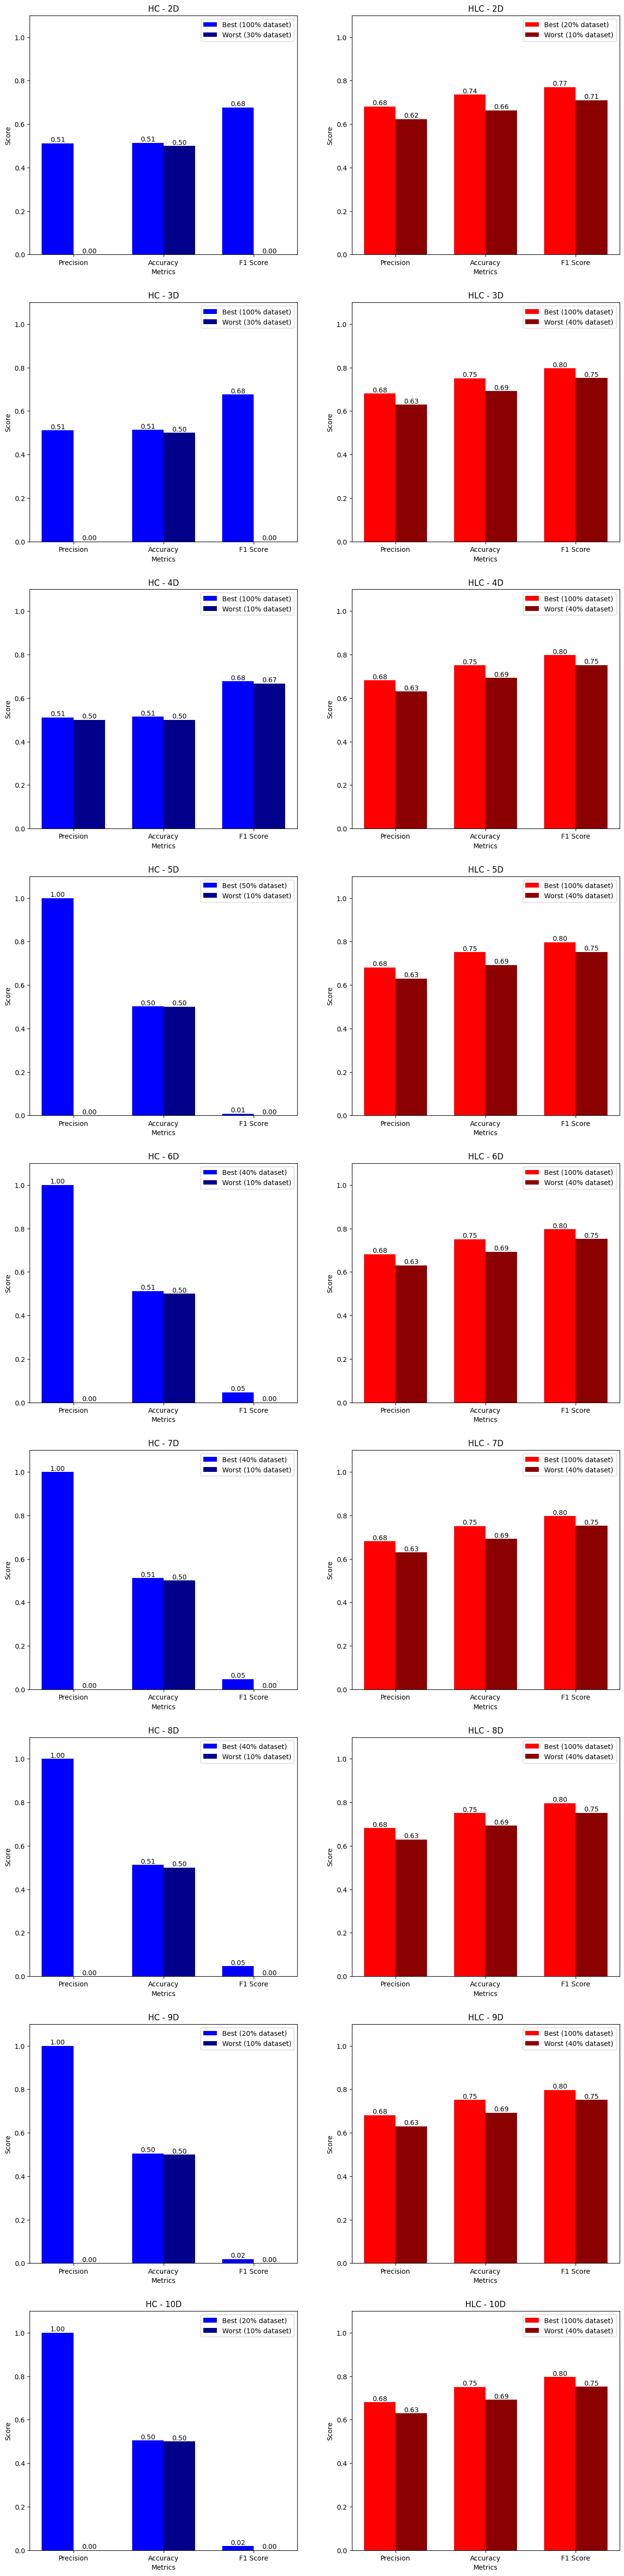

In [154]:
i = 4 
file_path = ['results/qsvc_results_correlation_10_0.csv', 'results/qsvc_results_correlation_10_10.csv', 'results/svc_qkernel_results_correlation_10_0.csv',
             'results/svc_qkernel_results_correlation_10_10.csv', 'results/svc_results_correlation_10_0.csv', 'results/svc_results_correlation_10_10.csv']

df1 = read_csv_files(file_path[i]) #HLC
df2 = read_csv_files(file_path[i+1]) #HC
bar_graph_by_dimension(df2, df1)
#bar_grafic_10_100_dataset(df1, df2)
#line_graph_10_100_dataset(df1, df2)


### SVM Model + QKernel Performance - Figure 3_2

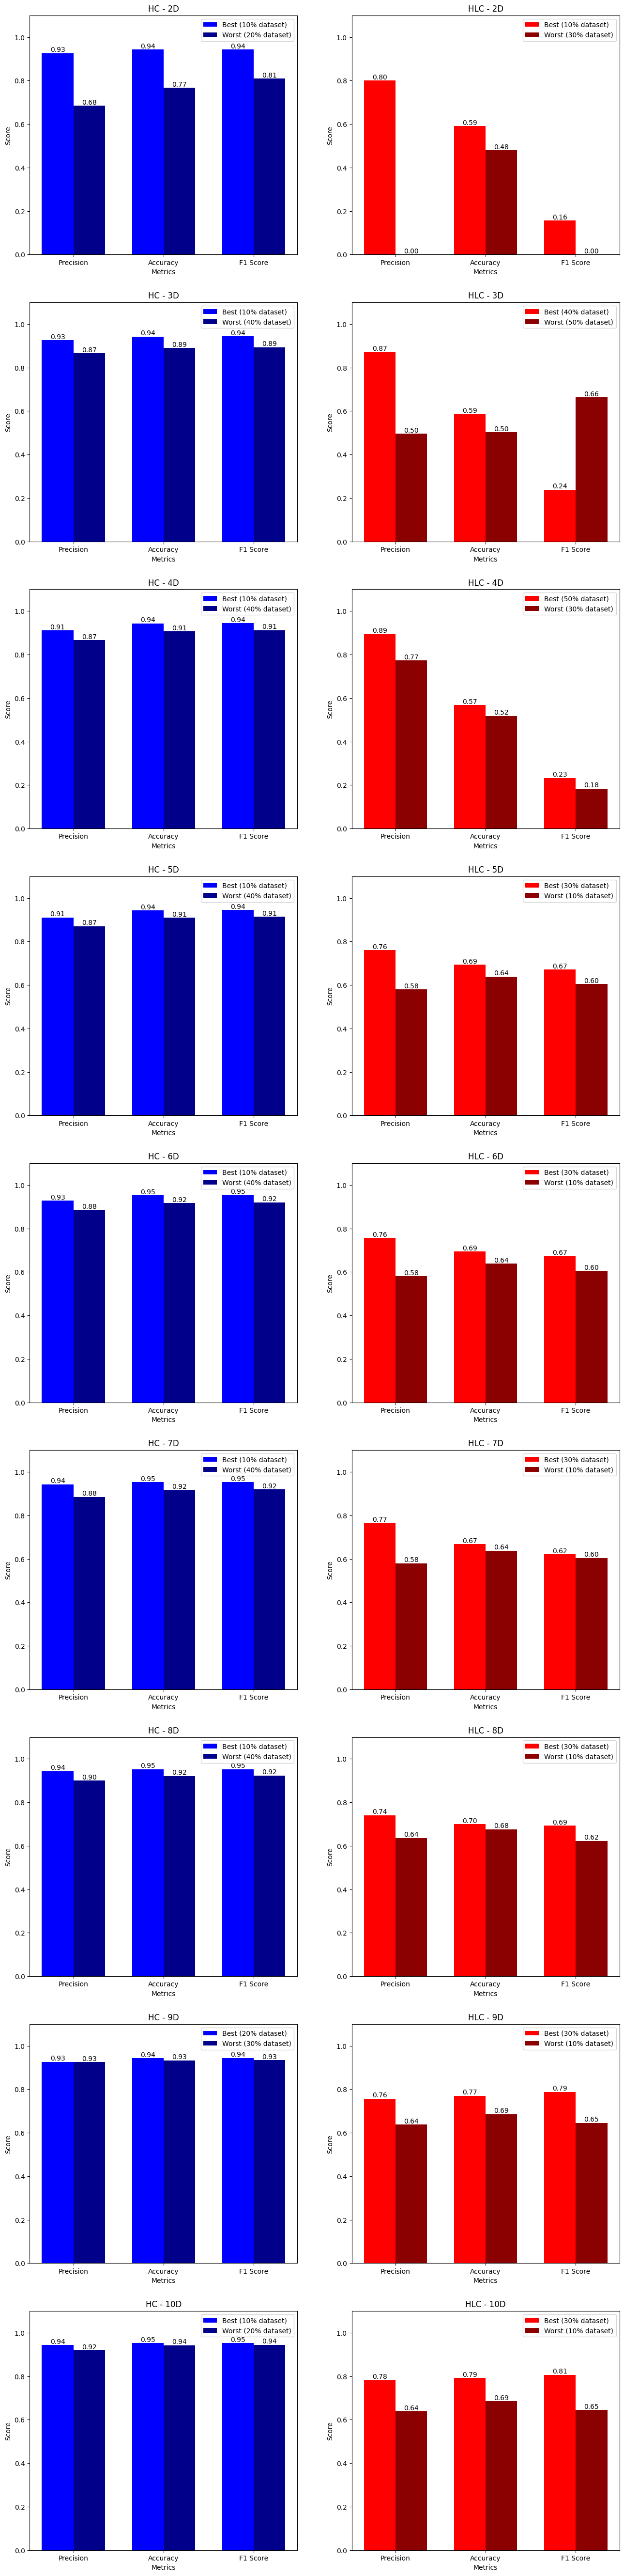

In [155]:
i = 2 
file_path = ['results/qsvc_results_correlation_10_0.csv', 'results/qsvc_results_correlation_10_10.csv', 'results/svc_qkernel_results_correlation_10_0.csv',
             'results/svc_qkernel_results_correlation_10_10.csv', 'results/svc_results_correlation_10_0.csv', 'results/svc_results_correlation_10_10.csv']

df3 = read_csv_files(file_path[i]) #HLC
df4 = read_csv_files(file_path[i+1]) #HC
bar_graph_by_dimension(df3, df4)
# bar_grafic_10_100_dataset(df3, df4)
# line_graph_10_100_dataset(df1, df2)


### QSVC Performance - Figure 3_3

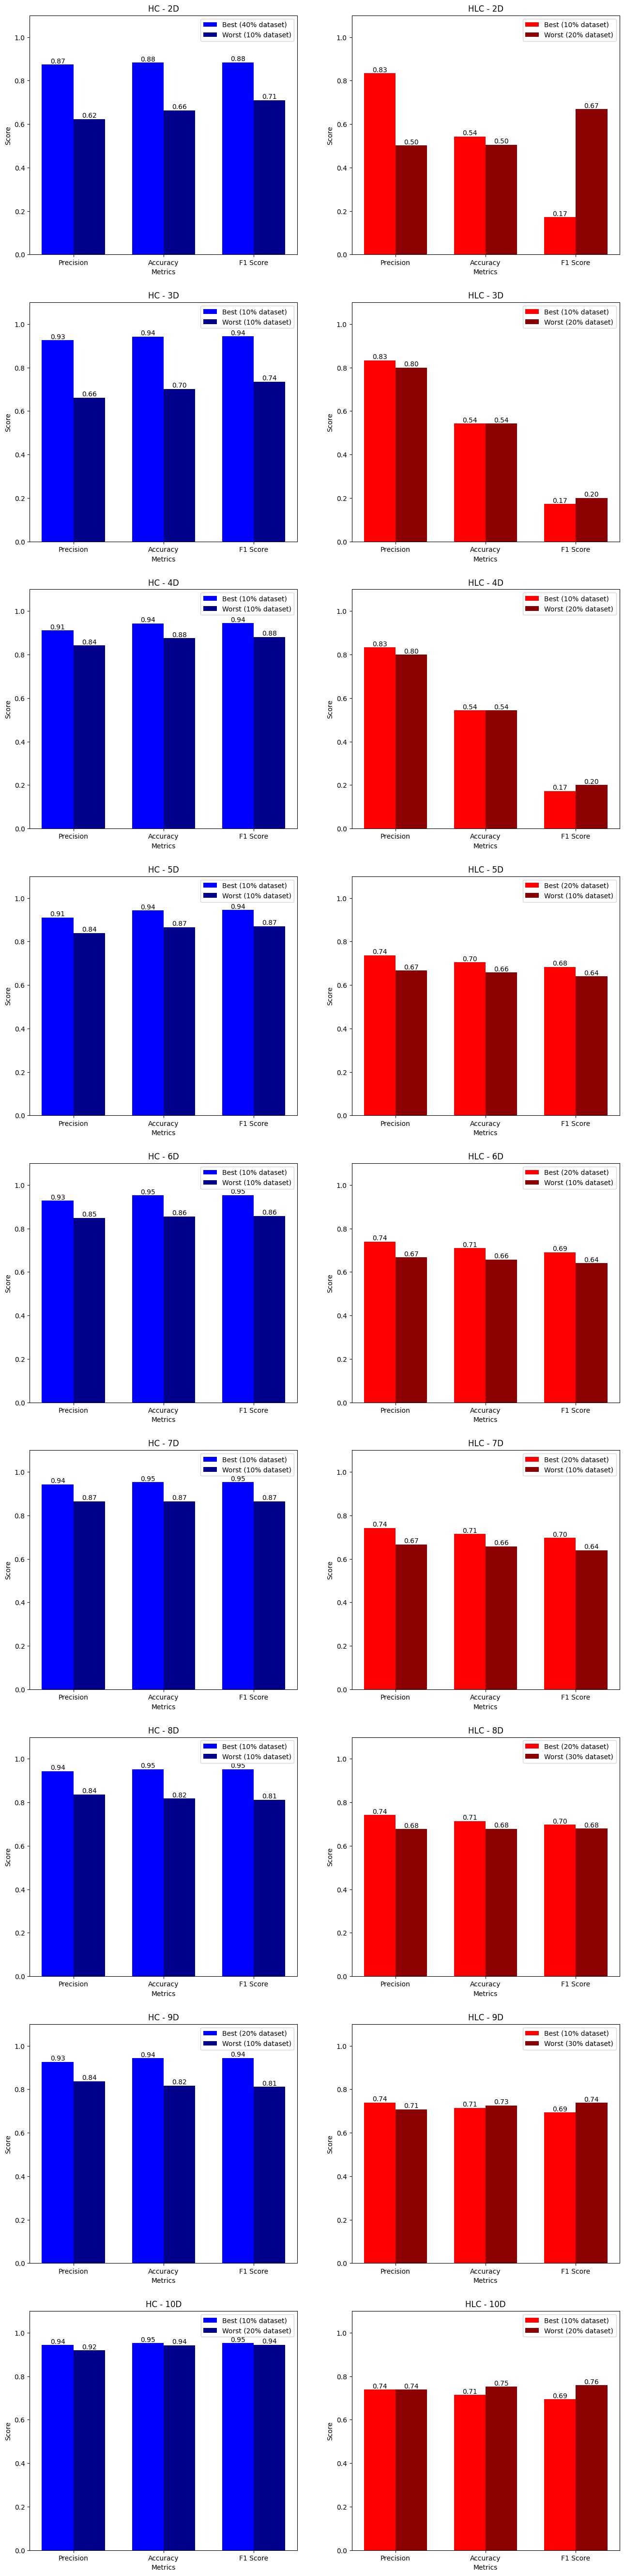

In [156]:
i = 0 
file_path = ['results/qsvc_results_correlation_10_0.csv', 'results/qsvc_results_correlation_10_10.csv', 'results/svc_qkernel_results_correlation_10_0.csv',
             'results/svc_qkernel_results_correlation_10_10.csv', 'results/svc_results_correlation_10_0.csv', 'results/svc_results_correlation_10_10.csv']

df5 = read_csv_files(file_path[i])
df6 = read_csv_files(file_path[i+1])
bar_graph_by_dimension(df5, df6)
# bar_grafic_10_100_dataset(df5, df6)
# line_graph_10_100_dataset(df1, df2)


#### Best vs Worst performance - Figure 3_4

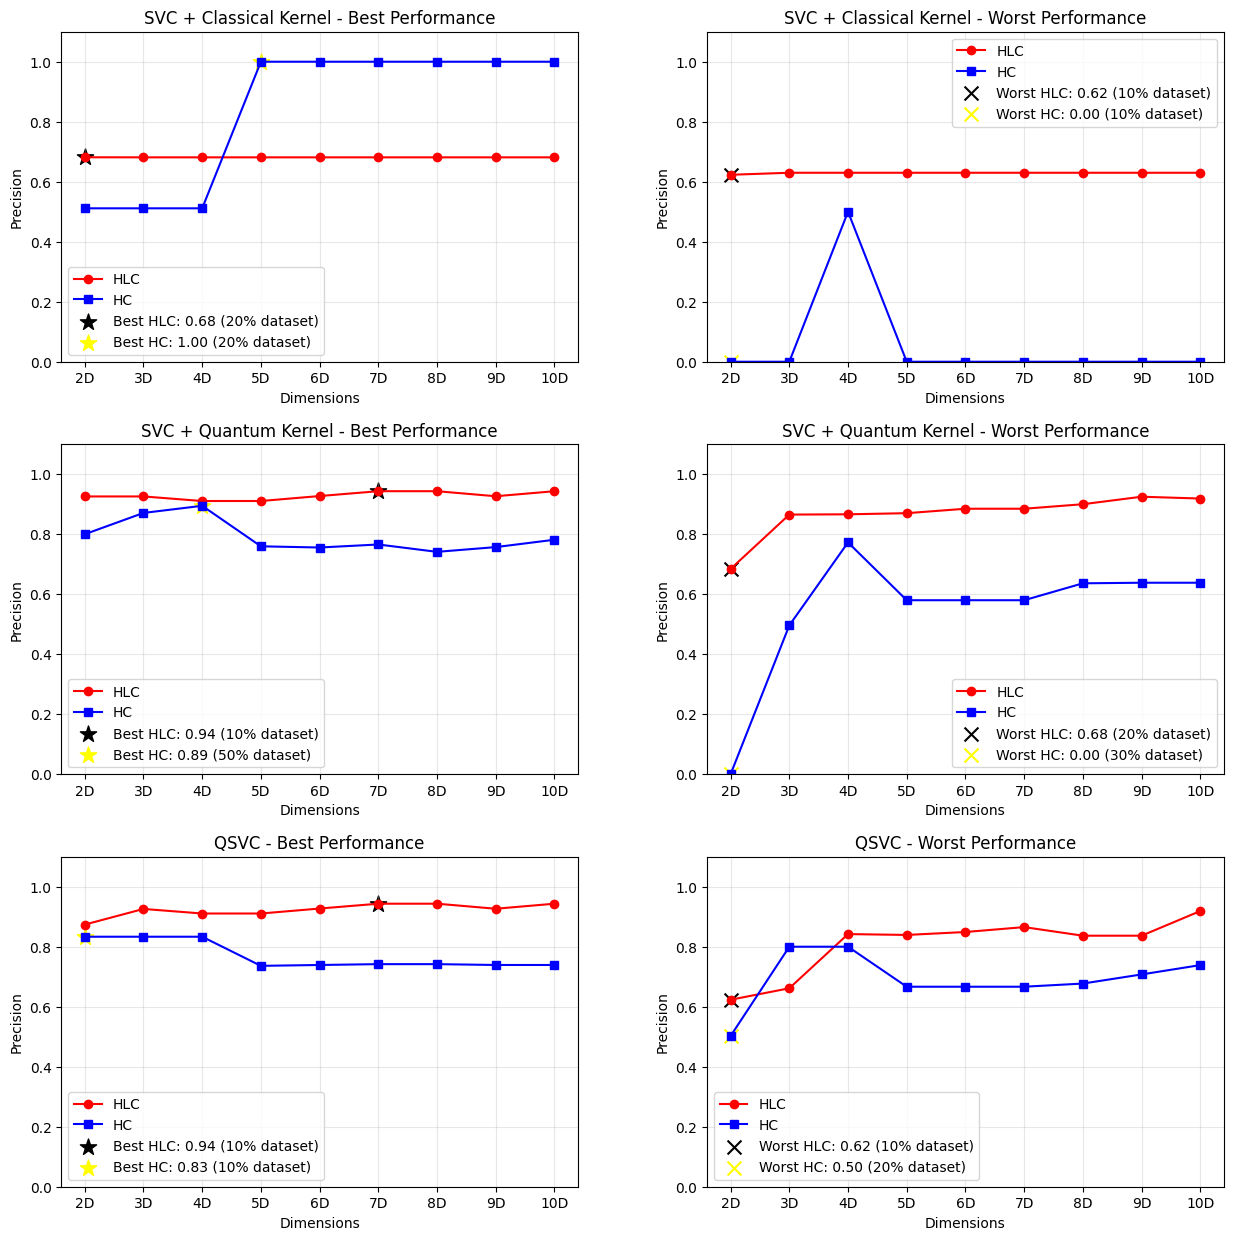

In [188]:
def plot_best_worst_comparison(df1, df2, df3, df4, df5, df6, total_samples=5180):
    """Plot best (left column) and worst (right column) performance in 3x2 grid"""
    # Create figure with 3x2 grid and tight layout
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    plt.subplots_adjust(wspace=0.25, hspace=0.25)
    
    # Define dimensions to analyze
    dimensions = range(2, 11)
    
    # Process each algorithm pair
    for row, (df_a, df_b, title) in enumerate(zip(
        [df1, df3, df5],
        [df2, df4, df6],
        ['SVC + Classical Kernel', 'SVC + Quantum Kernel', 'QSVC']
    )):
        # --- LEFT COLUMN: Best Performance ---
        ax = axes[row, 0]
        
        try:
            # Get best precision for each dimension
            best_a = df_a[df_a['Dimension'].isin(dimensions)].groupby('Dimension')['Precision'].max()
            best_b = df_b[df_b['Dimension'].isin(dimensions)].groupby('Dimension')['Precision'].max()
            
            # Find overall best cases
            best_a_idx = df_a['Precision'].idxmax()
            best_b_idx = df_b['Precision'].idxmax()
            
            best_a_samples = df_a.loc[best_a_idx, 'Samples']
            best_b_samples = df_b.loc[best_b_idx, 'Samples']
            
            # Calculate percentage of samples (rounded to nearest 10%)
            best_a_pct = round((best_a_samples / total_samples) * 10) * 10
            best_b_pct = round((best_b_samples / total_samples) * 10) * 10
            
            best_a_val = df_a.loc[best_a_idx, 'Precision']
            best_b_val = df_b.loc[best_b_idx, 'Precision']
            
            # Plot best performance
            line_a, = ax.plot(best_a.index, best_a.values, marker='o', color='red', label='HLC')
            line_b, = ax.plot(best_b.index, best_b.values, marker='s', color='blue', label='HC')
            
            # Mark best cases with sample percentage
            ax.scatter(best_a.idxmax(), best_a.max(), color='black', marker='*', s=150, 
                      label=f'Best HLC: {best_a_val:.2f} ({best_a_pct}% dataset)')
            ax.scatter(best_b.idxmax(), best_b.max(), color='yellow', marker='*', s=150,
                      label=f'Best HC: {best_b_val:.2f} ({best_b_pct}% dataset)')
            
            # Formatting
            ax.set_title(f'{title} - Best Performance')
            ax.set_xlabel('Dimensions')
            ax.set_ylabel('Precision')
            ax.set_xticks(dimensions)
            ax.set_xticklabels([f'{d}D' for d in dimensions])
            ax.set_ylim(0, 1.1)
            ax.legend()
            ax.grid(True, alpha=0.3)
            
        except Exception as e:
            ax.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', color='red')
            ax.set_title(title)
        
        # --- RIGHT COLUMN: Worst Performance ---
        ax = axes[row, 1]
        
        try:
            # Get worst precision for each dimension
            worst_a = df_a[df_a['Dimension'].isin(dimensions)].groupby('Dimension')['Precision'].min()
            worst_b = df_b[df_b['Dimension'].isin(dimensions)].groupby('Dimension')['Precision'].min()
            
            # Find overall worst cases
            worst_a_idx = df_a['Precision'].idxmin()
            worst_b_idx = df_b['Precision'].idxmin()
            
            worst_a_samples = df_a.loc[worst_a_idx, 'Samples']
            worst_b_samples = df_b.loc[worst_b_idx, 'Samples']
            
            # Calculate percentage of samples (rounded to nearest 10%)
            worst_a_pct = round((worst_a_samples / total_samples) * 10) * 10
            worst_b_pct = round((worst_b_samples / total_samples) * 10) * 10
            
            worst_a_val = df_a.loc[worst_a_idx, 'Precision']
            worst_b_val = df_b.loc[worst_b_idx, 'Precision']
            
            # Plot worst performance
            line_a, = ax.plot(worst_a.index, worst_a.values, marker='o', color='red', label='HLC')
            line_b, = ax.plot(worst_b.index, worst_b.values, marker='s', color='blue', label='HC')
            
            # Mark worst cases with sample percentage
            ax.scatter(worst_a.idxmin(), worst_a.min(), color='black', marker='x', s=100,
                      label=f'Worst HLC: {worst_a_val:.2f} ({worst_a_pct}% dataset)')
            ax.scatter(worst_b.idxmin(), worst_b.min(), color='yellow', marker='x', s=100,
                      label=f'Worst HC: {worst_b_val:.2f} ({worst_b_pct}% dataset)')
            
            # Formatting
            ax.set_title(f'{title} - Worst Performance')
            ax.set_xlabel('Dimensions')
            ax.set_ylabel('Precision')
            ax.set_xticks(dimensions)
            ax.set_xticklabels([f'{d}D' for d in dimensions])
            ax.set_ylim(0, 1.1)
            ax.legend()
            ax.grid(True, alpha=0.3)
            
        except Exception as e:
            ax.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', color='red')
            ax.set_title(title)
    
    plt.show()
plot_best_worst_comparison(*dfs)

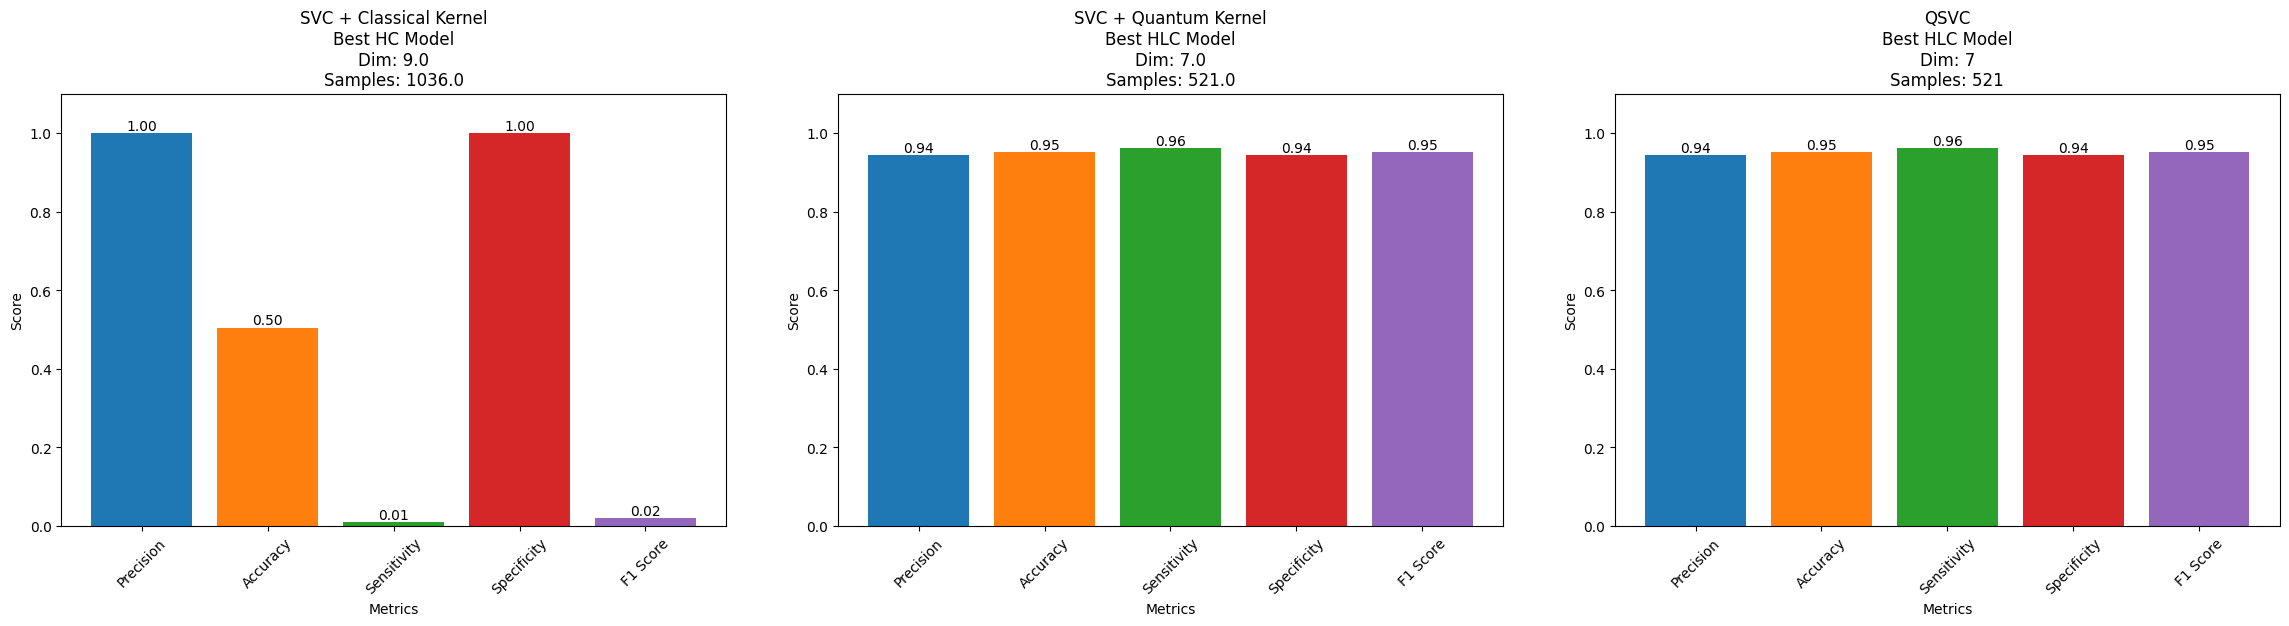

In [189]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_best_model_metrics(df1, df2, df3, df4, df5, df6):
    # Create figure with 1x3 grid
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    fig.tight_layout(pad=5.0)
    
    # Define metrics to plot
    metrics = ['Precision', 'Accuracy', 'Sensitivity', 'Specificity', 'F1 Score']
    
    # Process each dataframe pair
    for i, (df_a, df_b, title) in enumerate(zip(
        [df1, df3, df5],
        [df2, df4, df6],
        ['SVC + Classical Kernel', 'SVC + Quantum Kernel', 'QSVC']
    )):
        ax = axes[i]
        
        # Filter for dimensions 2-10 only
        df_a = df_a[(df_a['Dimension'] >= 2) & (df_a['Dimension'] <= 10)].copy()
        df_b = df_b[(df_b['Dimension'] >= 2) & (df_b['Dimension'] <= 10)].copy()
        
        # Skip if either dataframe is empty after filtering
        if len(df_a) == 0 or len(df_b) == 0:
            ax.text(0.5, 0.5, 'No data available (2-10 dim)', 
                   ha='center', va='center')
            ax.set_title(title)
            continue
            
        try:
            # Find best model from each dataframe (highest precision)
            best_a = df_a.loc[df_a['Precision'].idxmax()]
            best_b = df_b.loc[df_b['Precision'].idxmax()]
            
            # Select the overall best model between the two
            best_model = best_a if best_a['Precision'] > best_b['Precision'] else best_b
            model_type = 'HLC' if best_a['Precision'] > best_b['Precision'] else 'HC'
            
            # Get metric values
            metric_values = [best_model.get(metric, 0) for metric in metrics]  # 0 if metric missing
            
            # Create bar plot
            x = np.arange(len(metrics))
            colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Distinct colors
            bars = ax.bar(x, metric_values, color=colors)
            
            # Add value labels on top of each bar
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}',
                       ha='center', va='bottom')
            
            # Formatting - removed grid lines
            title_parts = [title, f'Best {model_type} Model',
                          f'Dim: {best_model.get("Dimension", "N/A")}',
                          f'Samples: {best_model.get("Samples", "N/A")}']
            
            ax.set_title('\n'.join(title_parts))
            ax.set_xlabel('Metrics')
            ax.set_ylabel('Score')
            ax.set_xticks(x)
            ax.set_xticklabels(metrics, rotation=45)
            ax.set_ylim(0, 1.1)
            
            # Remove grid lines completely
            ax.set_axisbelow(False)
            for spine in ax.spines.values():
                spine.set_visible(True)
            
        except (KeyError, ValueError) as e:
            ax.text(0.5, 0.5, f'Error: {str(e)}', 
                   ha='center', va='center', color='red')
            ax.set_title(title)
    
    plt.show()

plot_best_model_metrics(*dfs)

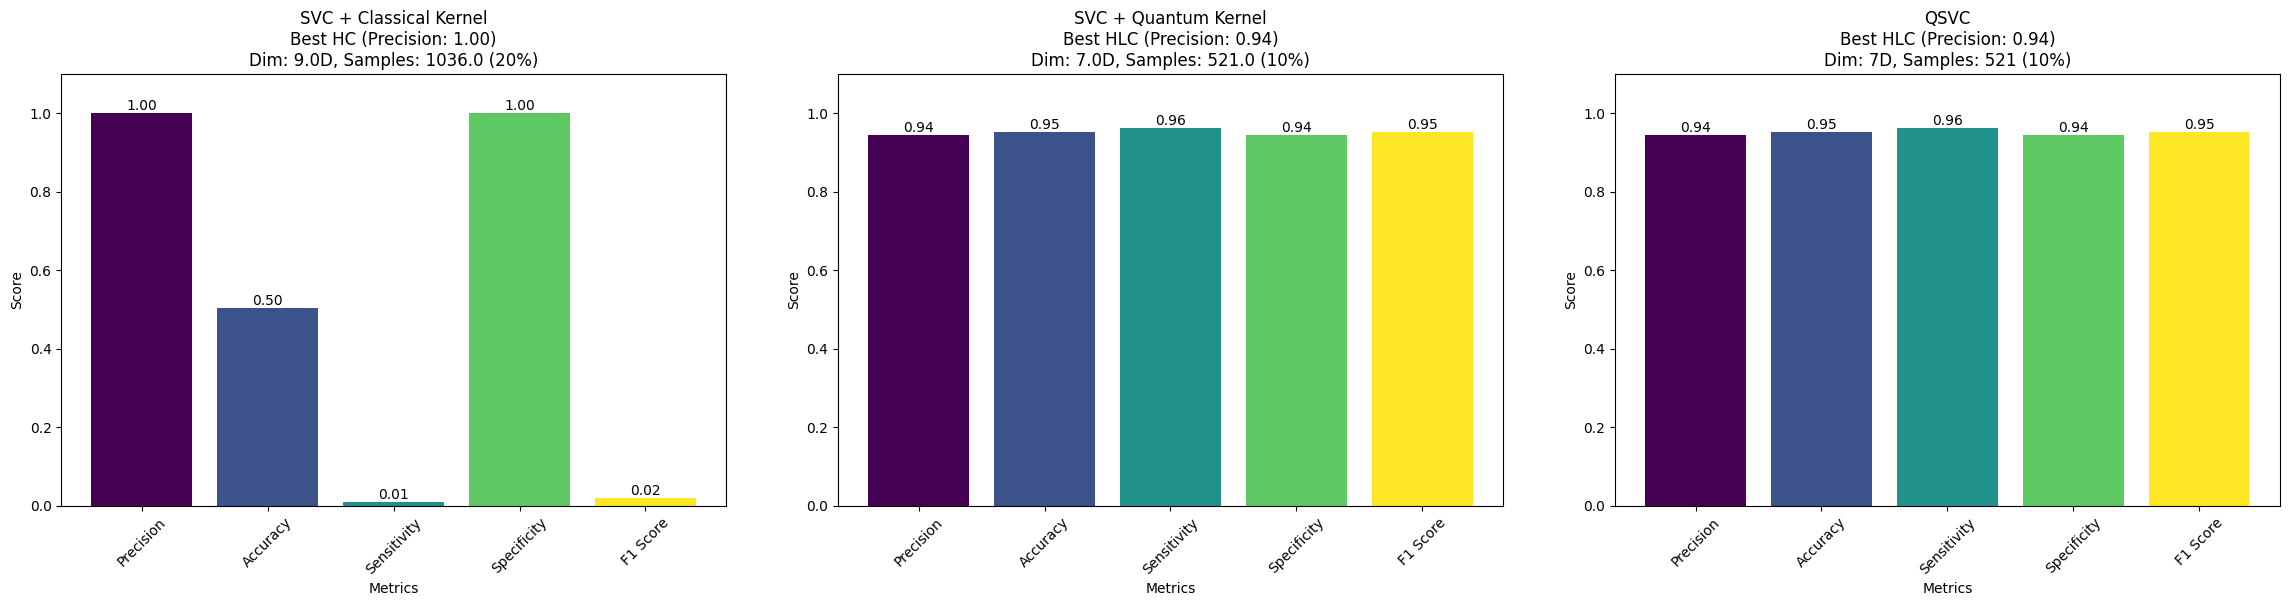

In [190]:
def plot_best_models_comparison(df1, df2, df3, df4, df5, df6, total_samples=5180):
    """Plot comparison of best models from each algorithm pair with sample info"""
    # Create figure with 1x3 grid
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    fig.tight_layout(pad=5.0)
    
    # Define metrics to plot
    metrics = ['Precision', 'Accuracy', 'Sensitivity', 'Specificity', 'F1 Score']
    
    # Process each dataframe pair
    for i, (df_a, df_b, title) in enumerate(zip(
        [df1, df3, df5],
        [df2, df4, df6],
        ['SVC + Classical Kernel', 'SVC + Quantum Kernel', 'QSVC']
    )):
        ax = axes[i]
        
        try:
            # Verify required columns exist
            required_cols = ['Precision', 'Dimension', 'Samples'] + metrics
            for col in required_cols:
                if col not in df_a.columns or col not in df_b.columns:
                    raise KeyError(f"Missing required column: {col}")
            
            # Filter for dimensions 2-10
            df_a = df_a[(df_a['Dimension'].between(2, 10))].copy()
            df_b = df_b[(df_b['Dimension'].between(2, 10))].copy()
            
            if len(df_a) == 0 and len(df_b) == 0:
                ax.text(0.5, 0.5, 'No data (2-10D)', ha='center', va='center')
                ax.set_title(title)
                continue
                
            # Find best model in each dataframe
            best_a = df_a.loc[df_a['Precision'].idxmax()] if len(df_a) > 0 else None
            best_b = df_b.loc[df_b['Precision'].idxmax()] if len(df_b) > 0 else None
            
            # Select the overall best model
            if best_a is not None and best_b is not None:
                if best_a['Precision'] > best_b['Precision']:
                    best_model = best_a
                    model_type = 'HLC'
                else:
                    best_model = best_b
                    model_type = 'HC'
            elif best_a is not None:
                best_model = best_a
                model_type = 'HLC'
            else:
                best_model = best_b
                model_type = 'HC'
            
            # Calculate sample percentage
            sample_pct = round((best_model['Samples'] / total_samples) * 100)
            
            # Get metric values
            metric_values = [best_model[metric] for metric in metrics]
            
            # Create bar plot
            x = np.arange(len(metrics))
            colors = plt.cm.viridis(np.linspace(0, 1, len(metrics)))
            bars = ax.bar(x, metric_values, color=colors)
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}', ha='center', va='bottom')
            
            # Formatting with sample info
            title_text = f"{title}\nBest {model_type} (Precision: {best_model['Precision']:.2f})\n"
            title_text += f"Dim: {best_model['Dimension']}D, Samples: {best_model['Samples']} ({sample_pct}%)"
            
            ax.set_title(title_text)
            ax.set_xlabel('Metrics')
            ax.set_ylabel('Score')
            ax.set_xticks(x)
            ax.set_xticklabels(metrics, rotation=45)
            ax.set_ylim(0, 1.1)
            ax.grid(False)
            
        except Exception as e:
            ax.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', color='red')
            ax.set_title(title)
    
    plt.show()

# Example usage:
plot_best_models_comparison(*dfs)

# Hardware Performance

## Image 4_1


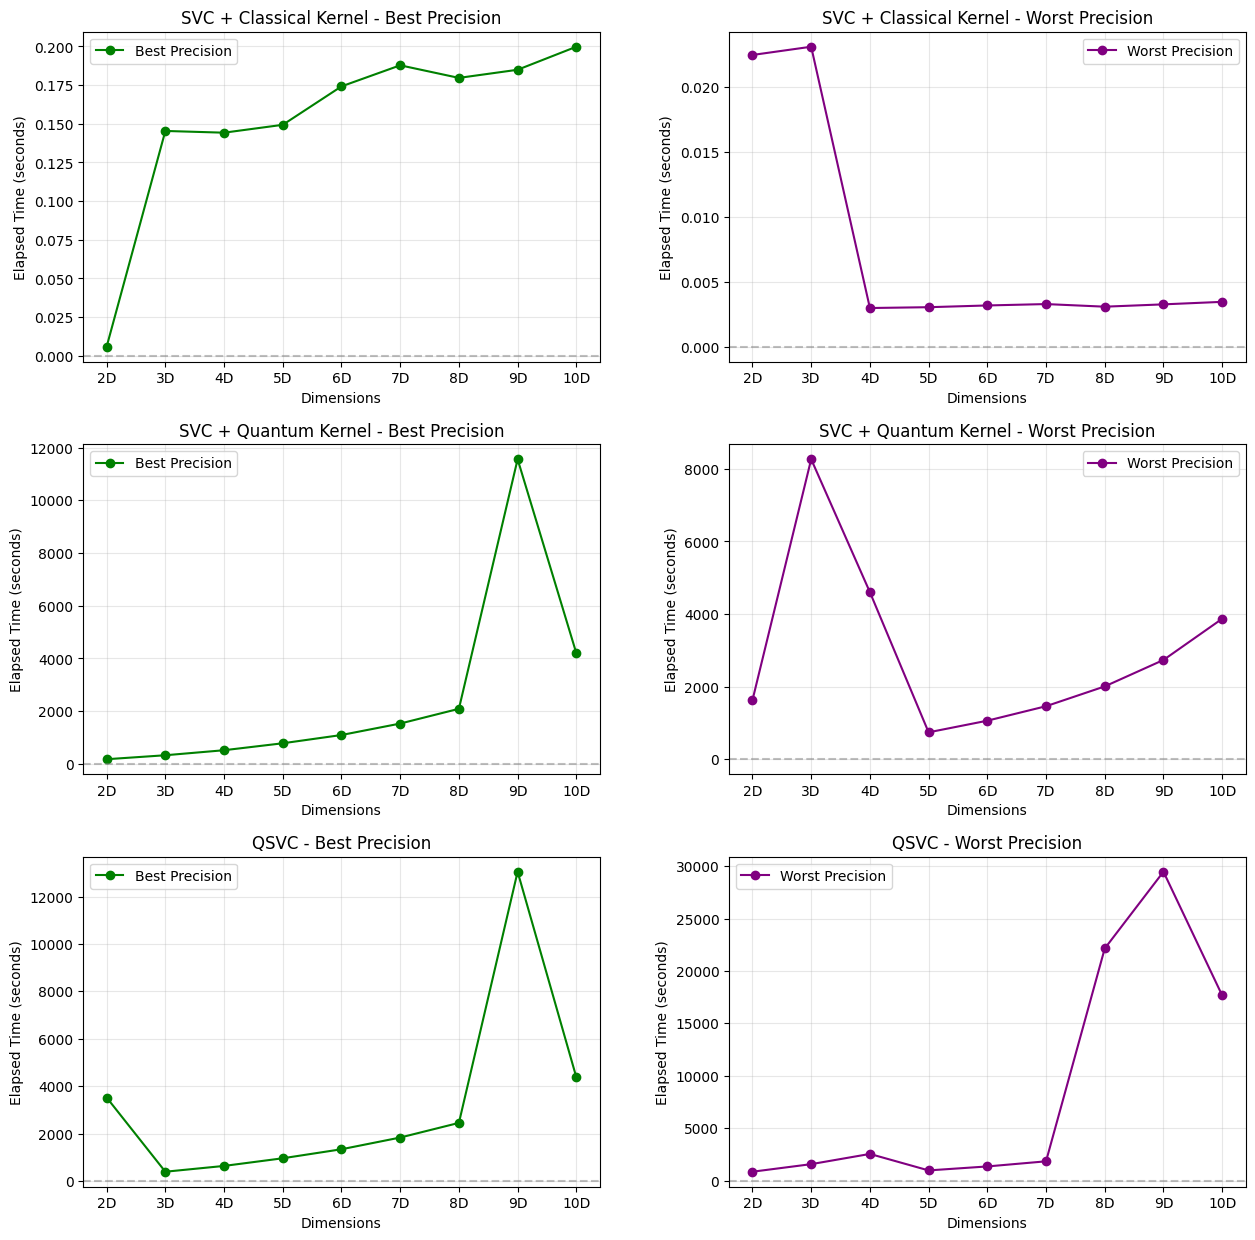

In [197]:
import matplotlib.pyplot as plt

def plot_elapsed_time_vs_dimension(df1, df2, df3, df4, df5, df6):
    """Plot elapsed time vs dimensions for best and worst precision configurations"""
    # fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # 3 rows, 2 columns
    # fig.tight_layout(pad=5.0)
    # Create figure with 3x2 grid and tight layout
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    plt.subplots_adjust(wspace=0.25, hspace=0.25)
    
    # Define dimensions to analyze
    dimensions = range(2, 11)
    
    # Process each algorithm pair
    for row, (df_a, df_b, title) in enumerate(zip(
        [df1, df3, df5],
        [df2, df4, df6],
        ['SVC + Classical Kernel', 'SVC + Quantum Kernel', 'QSVC']
    )):
        for col, (df, label, color) in enumerate(zip(
            [df_a, df_b],  # Best and worst cases
            ['Best Precision', 'Worst Precision'],
            ['green', 'purple']
        )):
            ax = axes[row, col]

            try:
                elapsed_times = []

                # Find best & worst precision configurations for each dimension
                for dim in dimensions:
                    df_dim = df[df['Dimension'] == dim]

                    if not df_dim.empty:
                        best_entry = df_dim.loc[df_dim['Precision'].idxmax()] if col == 0 else df_dim.loc[df_dim['Precision'].idxmin()]
                        elapsed_times.append(best_entry['Elapsed Time (s)'])

                # Plot elapsed times
                ax.plot(dimensions, elapsed_times, marker='o', color=color, label=label)
                
                # Formatting
                ax.set_title(f'{title} - {label}')
                ax.set_xlabel('Dimensions')
                ax.set_ylabel('Elapsed Time (seconds)')
                ax.set_xticks(dimensions)
                ax.set_xticklabels([f'{d}D' for d in dimensions])
                ax.legend()
                ax.grid(True, alpha=0.3)
                
                # Horizontal reference line
                ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

            except Exception as e:
                ax.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', color='red')
                ax.set_title(title)

    plt.show()

# Example usage:
plot_elapsed_time_vs_dimension(*dfs)

posx and posy should be finite values
posx and posy should be finite values


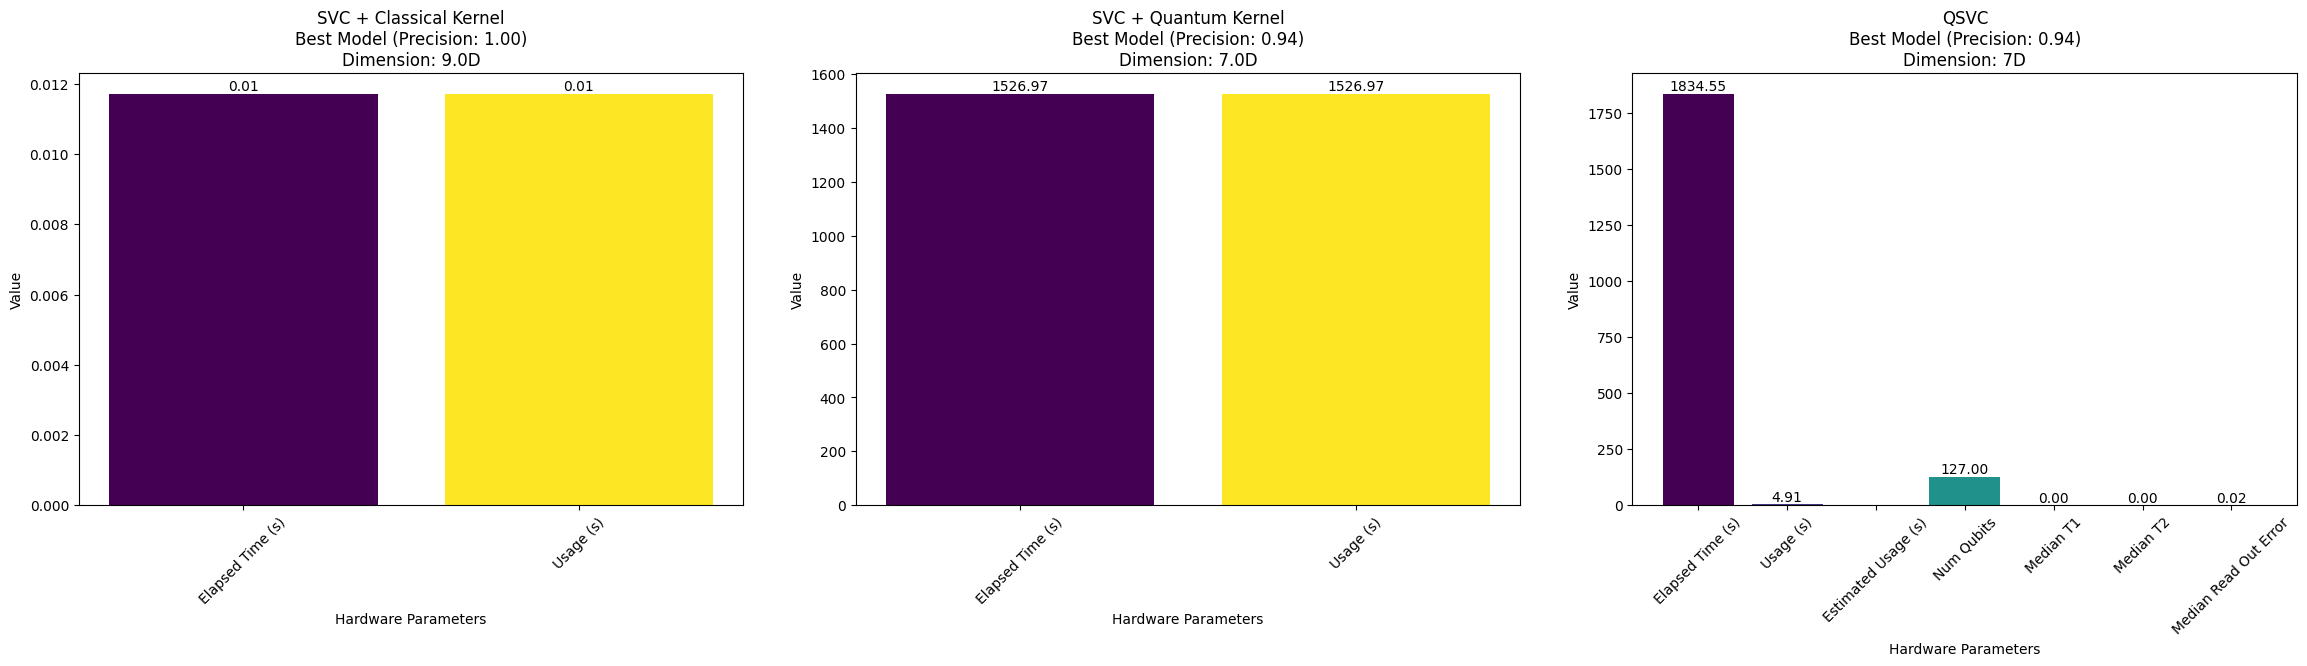

In [196]:
import matplotlib.pyplot as plt
import numpy as np

def plot_best_models_hardware(df1, df2, df3, df4, df5, df6):
    """Plot hardware parameters for the best precision model in each category"""
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    fig.tight_layout(pad=5.0)
    
    # Define parameter sets
    param_sets = [
        ['Elapsed Time (s)', 'Usage (s)'],  # First column
        ['Elapsed Time (s)', 'Usage (s)'],
        ['Elapsed Time (s)', 'Usage (s)', 'Estimated Usage (s)', 'Num Qubits', 'Median T1', 'Median T2', 'Median Read Out Error']   # Third column
    ]
    
    # Process each dataframe pair
    for i, (df_a, df_b, title, params) in enumerate(zip(
        [df1, df3, df5],
        [df2, df4, df6],
        ['SVC + Classical Kernel', 'SVC + Quantum Kernel', 'QSVC'],
        param_sets
    )):
        ax = axes[i]
        
        try:
            # Verify required columns exist
            for param in params:
                if param not in df_a.columns or param not in df_b.columns:
                    raise KeyError(f"Missing required column: {param}")
            
            # Filter for dimensions 2-10
            df_a = df_a[(df_a['Dimension'].between(2, 10))].copy()
            df_b = df_b[(df_b['Dimension'].between(2, 10))].copy()
            
            if len(df_a) == 0 and len(df_b) == 0:
                ax.text(0.5, 0.5, 'No data (2-10D)', ha='center', va='center')
                ax.set_title(title)
                continue
                
            # Find best model in each dataframe
            best_a = df_a.loc[df_a['Precision'].idxmax()] if len(df_a) > 0 else None
            best_b = df_b.loc[df_b['Precision'].idxmax()] if len(df_b) > 0 else None
            
            # Select the overall best model
            if best_a is not None and best_b is not None:
                best_model = best_a if best_a['Precision'] > best_b['Precision'] else best_b
            elif best_a is not None:
                best_model = best_a
            else:
                best_model = best_b
            
            # Get hardware parameter values
            param_values = [best_model[param] for param in params]
            
            # Create bar plot
            x = np.arange(len(params))
            colors = plt.cm.viridis(np.linspace(0, 1, len(params)))
            bars = ax.bar(x, param_values, color=colors)
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}', ha='center', va='bottom')
            
            # Formatting
            title_text = f"{title}\nBest Model (Precision: {best_model['Precision']:.2f})\nDimension: {best_model['Dimension']}D"
            ax.set_title(title_text)
            ax.set_xlabel('Hardware Parameters')
            ax.set_ylabel('Value')
            ax.set_xticks(x)
            ax.set_xticklabels(params, rotation=45)
            ax.grid(False)
            
        except Exception as e:
            ax.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', color='red')
            ax.set_title(title)
    
    plt.show()

# Example usage:
plot_best_models_hardware(*dfs)

posx and posy should be finite values
posx and posy should be finite values


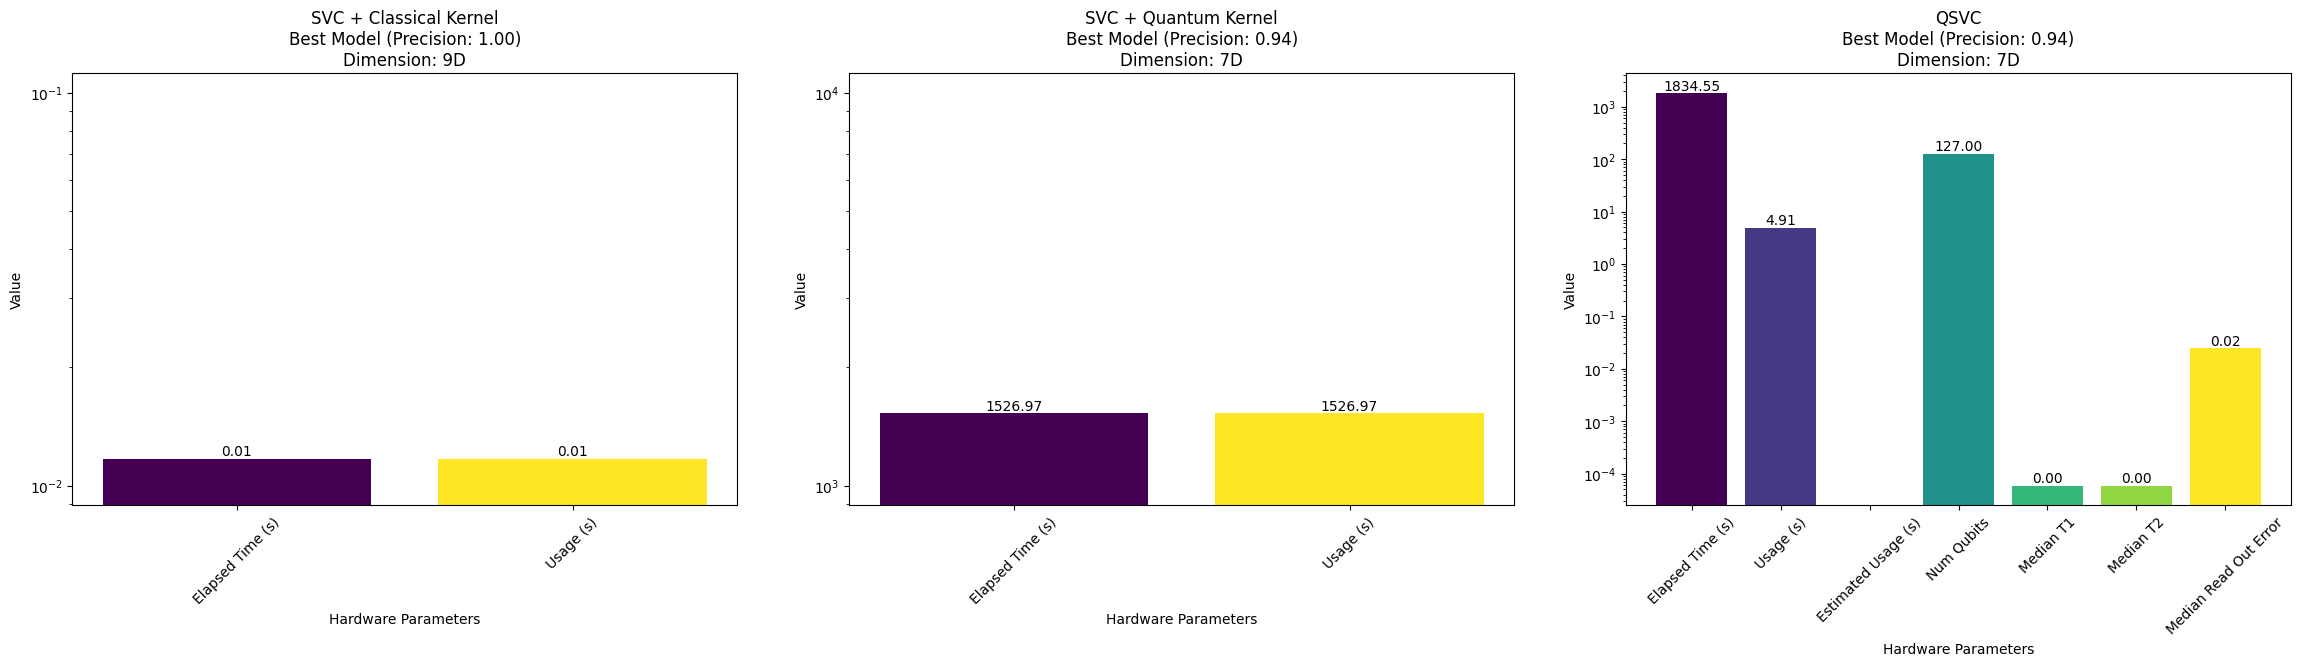

In [193]:
import matplotlib.pyplot as plt
import numpy as np

def plot_best_models_hardware(df1, df2, df3, df4, df5, df6):
    """Plot hardware parameters for the best precision model in each category"""
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    fig.tight_layout(pad=5.0)
    
    # Define parameter sets
    param_sets = [
        ['Elapsed Time (s)', 'Usage (s)'],  # First column
        ['Elapsed Time (s)', 'Usage (s)'],
        ['Elapsed Time (s)', 'Usage (s)', 'Estimated Usage (s)', 'Num Qubits', 'Median T1', 'Median T2', 'Median Read Out Error']
    ]
    
    # Process each dataframe pair
    for i, (df_a, df_b, title, params) in enumerate(zip(
        [df1, df3, df5],
        [df2, df4, df6],
        ['SVC + Classical Kernel', 'SVC + Quantum Kernel', 'QSVC'],
        param_sets
    )):
        ax = axes[i]
        
        try:
            # Verify required columns exist
            for param in params:
                if param not in df_a.columns or param not in df_b.columns:
                    raise KeyError(f"Missing required column: {param}")
            
            # Filter for dimensions 2-10
            df_a = df_a[(df_a['Dimension'].between(2, 10))].copy()
            df_b = df_b[(df_b['Dimension'].between(2, 10))].copy()
            
            if len(df_a) == 0 and len(df_b) == 0:
                ax.text(0.5, 0.5, 'No data (2-10D)', ha='center', va='center')
                ax.set_title(title)
                continue
                
            # Find best model in each dataframe
            best_a = df_a.loc[df_a['Precision'].idxmax()] if len(df_a) > 0 else None
            best_b = df_b.loc[df_b['Precision'].idxmax()] if len(df_b) > 0 else None
            
            # Select the overall best model
            if best_a is not None and best_b is not None:
                best_model = best_a if best_a['Precision'] > best_b['Precision'] else best_b
            elif best_a is not None:
                best_model = best_a
            else:
                best_model = best_b
            
            # Get hardware parameter values
            param_values = [best_model[param] for param in params]
            
            # Create bar plot
            x = np.arange(len(params))
            colors = plt.cm.viridis(np.linspace(0, 1, len(params)))
            bars = ax.bar(x, param_values, color=colors)
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}', ha='center', va='bottom')
            
            # Formatting
            title_text = f"{title}\nBest Model (Precision: {best_model['Precision']:.2f})\nDimension: {best_model['Dimension']}D"
            ax.set_title(title_text)
            ax.set_xlabel('Hardware Parameters')
            ax.set_ylabel('Value')
            ax.set_xticks(x)
            ax.set_xticklabels(params, rotation=45)

            # Use log scale for better visibility of both high and low values
            ax.set_yscale('log')  

            ax.grid(False)
            
        except Exception as e:
            ax.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', color='red')
            ax.set_title(title)
    
    plt.show()

# Example usage:
plot_best_models_hardware(df1, df2, df3, df4, df5, df6)

posx and posy should be finite values
posx and posy should be finite values


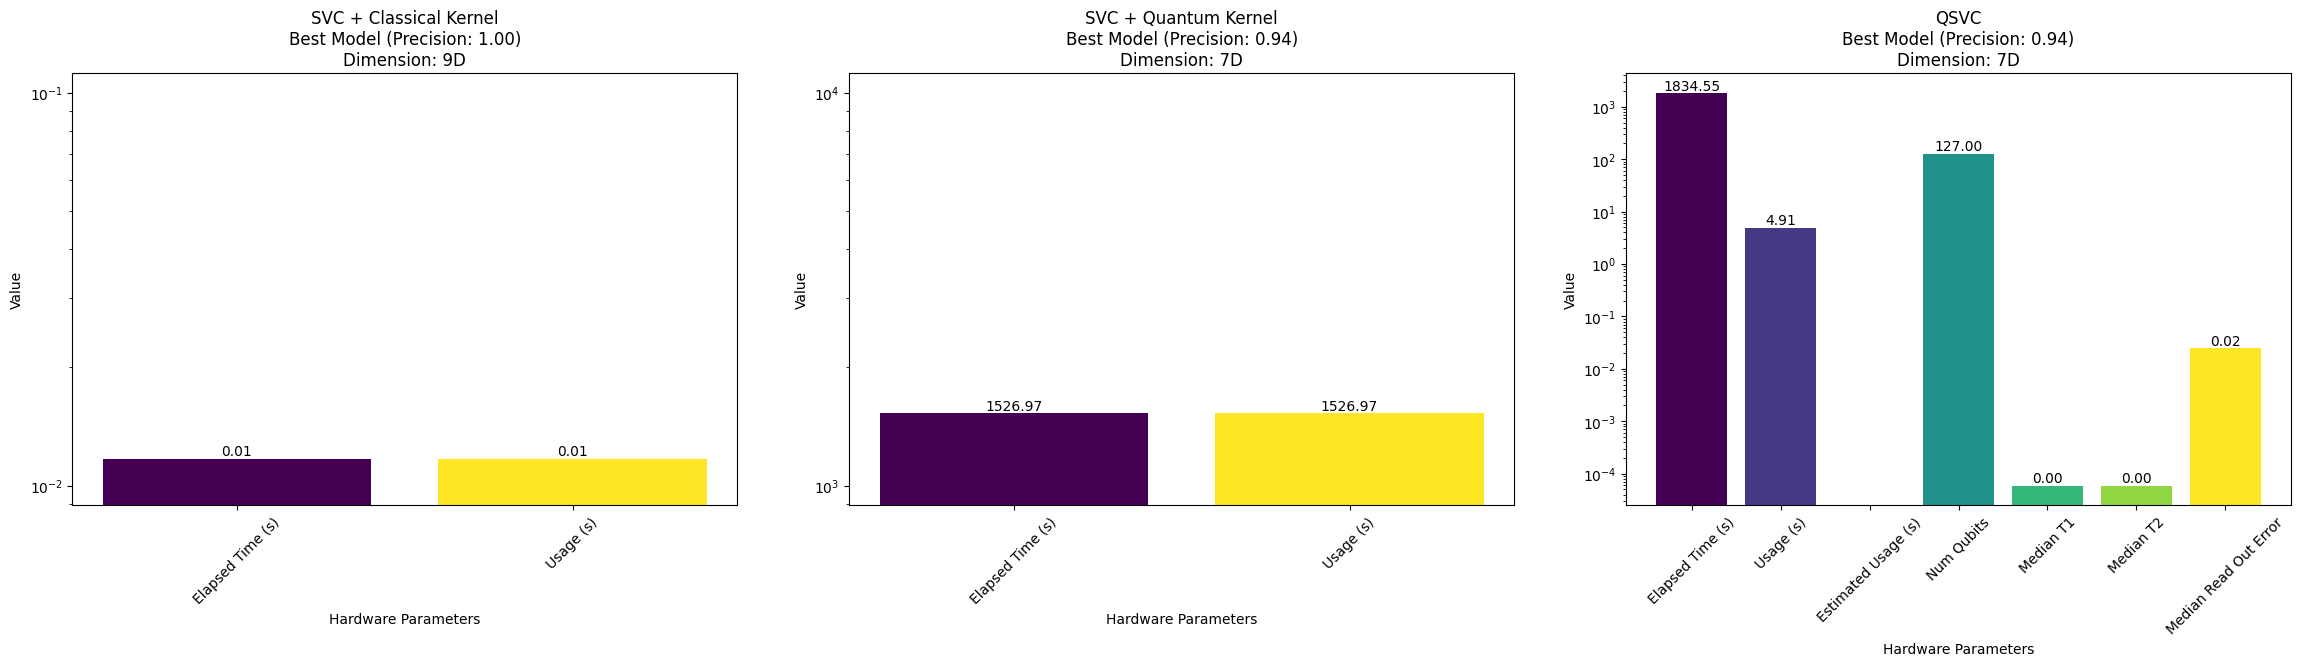

In [194]:
import matplotlib.pyplot as plt
import numpy as np

def plot_best_models_hardware(df1, df2, df3, df4, df5, df6):
    """Plot hardware parameters for the best precision model in each category"""
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    fig.tight_layout(pad=5.0)
    
    # Define parameter sets
    param_sets = [
        ['Elapsed Time (s)', 'Usage (s)'],  # First column
        ['Elapsed Time (s)', 'Usage (s)'],
        ['Elapsed Time (s)', 'Usage (s)', 'Estimated Usage (s)', 'Num Qubits', 'Median T1', 'Median T2', 'Median Read Out Error']
    ]
    
    # Process each dataframe pair
    for i, (df_a, df_b, title, params) in enumerate(zip(
        [df1, df3, df5],
        [df2, df4, df6],
        ['SVC + Classical Kernel', 'SVC + Quantum Kernel', 'QSVC'],
        param_sets
    )):
        ax = axes[i]
        
        try:
            # Verify required columns exist
            for param in params:
                if param not in df_a.columns or param not in df_b.columns:
                    raise KeyError(f"Missing required column: {param}")
            
            # Filter for dimensions 2-10
            df_a = df_a[(df_a['Dimension'].between(2, 10))].copy()
            df_b = df_b[(df_b['Dimension'].between(2, 10))].copy()
            
            if len(df_a) == 0 and len(df_b) == 0:
                ax.text(0.5, 0.5, 'No data (2-10D)', ha='center', va='center')
                ax.set_title(title)
                continue
                
            # Find best model in each dataframe
            best_a = df_a.loc[df_a['Precision'].idxmax()] if len(df_a) > 0 else None
            best_b = df_b.loc[df_b['Precision'].idxmax()] if len(df_b) > 0 else None
            
            # Select the overall best model
            if best_a is not None and best_b is not None:
                best_model = best_a if best_a['Precision'] > best_b['Precision'] else best_b
            elif best_a is not None:
                best_model = best_a
            else:
                best_model = best_b
            
            # Get hardware parameter values
            param_values = [best_model[param] for param in params]
            
            # Create bar plot
            x = np.arange(len(params))
            colors = plt.cm.viridis(np.linspace(0, 1, len(params)))
            bars = ax.bar(x, param_values, color=colors)
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}', ha='center', va='bottom')
            
            # Formatting
            title_text = f"{title}\nBest Model (Precision: {best_model['Precision']:.2f})\nDimension: {best_model['Dimension']}D"
            ax.set_title(title_text)
            ax.set_xlabel('Hardware Parameters')
            ax.set_ylabel('Value')
            ax.set_xticks(x)
            ax.set_xticklabels(params, rotation=45)

            # Use log scale for better visibility of both high and low values
            ax.set_yscale('log')  

            ax.grid(False)
            
        except Exception as e:
            ax.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', color='red')
            ax.set_title(title)
    
    plt.show()

# Example usage:
plot_best_models_hardware(df1, df2, df3, df4, df5, df6)

posx and posy should be finite values
posx and posy should be finite values


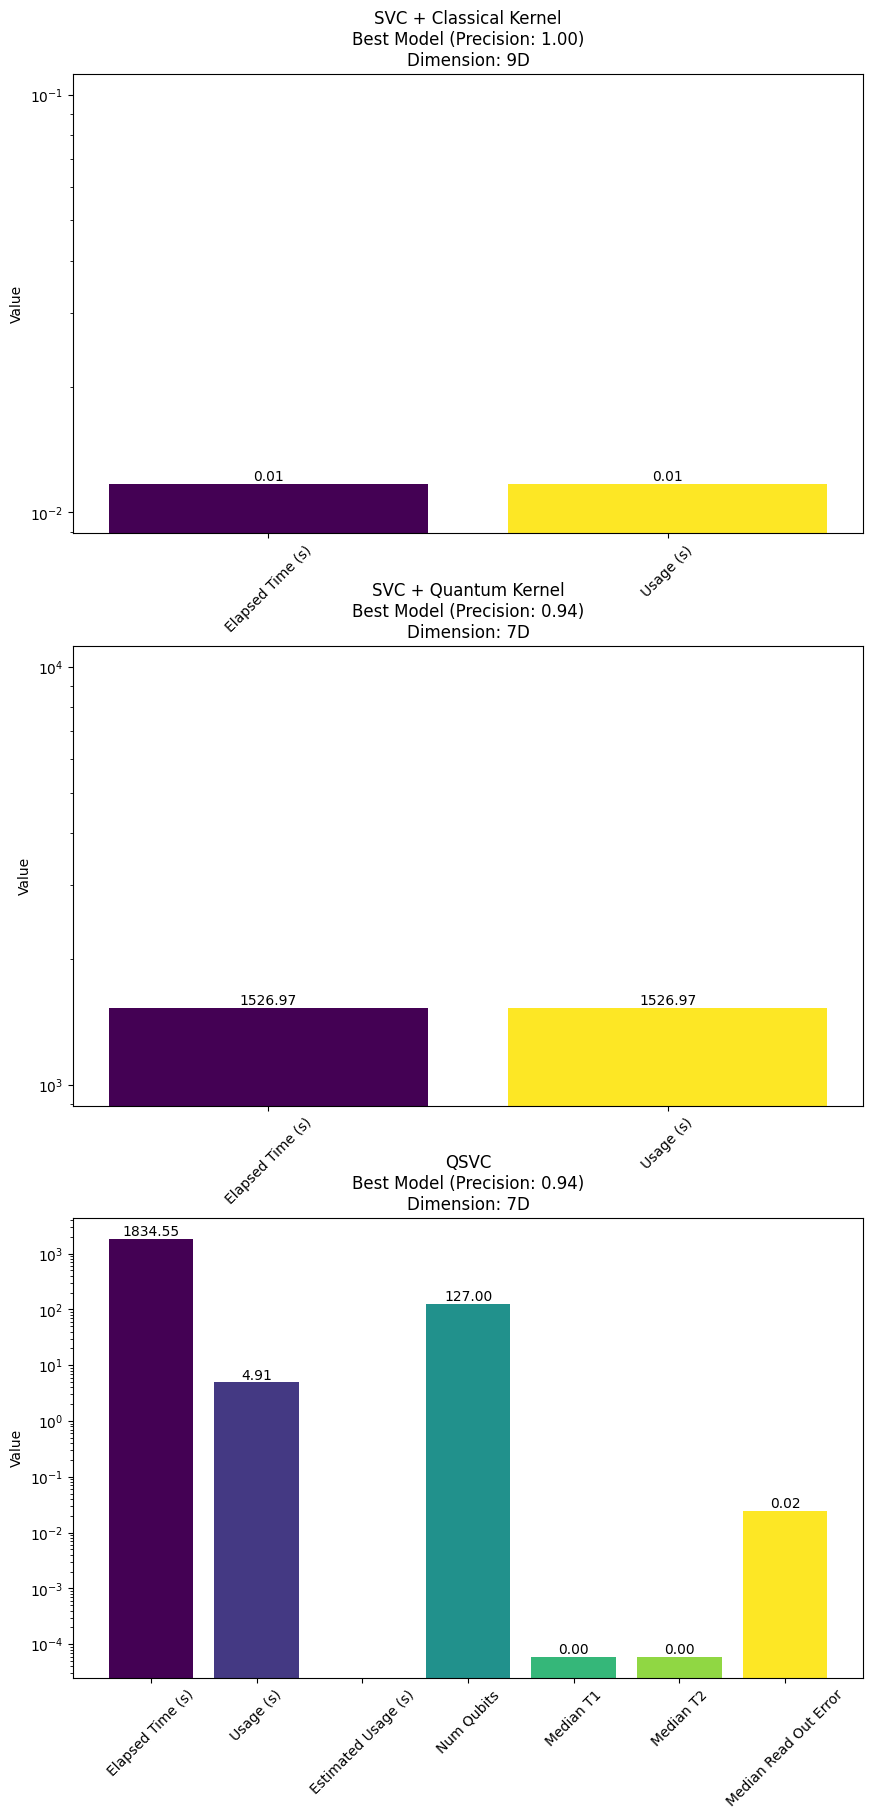

In [198]:
import matplotlib.pyplot as plt
import numpy as np

def plot_best_models_hardware(df1, df2, df3, df4, df5, df6):
    """Plot hardware parameters for the best precision model in each category (3 rows, 1 column)"""
    
    fig, axes = plt.subplots(3, 1, figsize=(10, 18))
    fig.tight_layout(pad=6.0)  # Adjust space between subplots
    
    # Define parameter sets
    param_sets = [
        ['Elapsed Time (s)', 'Usage (s)'],  # First row
        ['Elapsed Time (s)', 'Usage (s)'],  # Second row
        ['Elapsed Time (s)', 'Usage (s)', 'Estimated Usage (s)', 'Num Qubits', 'Median T1', 'Median T2', 'Median Read Out Error']  # Third row
    ]
    
    # Process each dataframe pair
    for i, (df_a, df_b, title, params) in enumerate(zip(
        [df1, df3, df5],
        [df2, df4, df6],
        ['SVC + Classical Kernel', 'SVC + Quantum Kernel', 'QSVC'],
        param_sets
    )):
        ax = axes[i]
        
        try:
            # Verify required columns exist
            for param in params:
                if param not in df_a.columns or param not in df_b.columns:
                    raise KeyError(f"Missing required column: {param}")
            
            # Filter for dimensions 2-10
            df_a = df_a[(df_a['Dimension'].between(2, 10))].copy()
            df_b = df_b[(df_b['Dimension'].between(2, 10))].copy()
            
            if len(df_a) == 0 and len(df_b) == 0:
                ax.text(0.5, 0.5, 'No data (2-10D)', ha='center', va='center')
                ax.set_title(title)
                continue
                
            # Find best model in each dataframe
            best_a = df_a.loc[df_a['Precision'].idxmax()] if len(df_a) > 0 else None
            best_b = df_b.loc[df_b['Precision'].idxmax()] if len(df_b) > 0 else None
            
            # Select the overall best model
            if best_a is not None and best_b is not None:
                best_model = best_a if best_a['Precision'] > best_b['Precision'] else best_b
            elif best_a is not None:
                best_model = best_a
            else:
                best_model = best_b
            
            # Get hardware parameter values
            param_values = [best_model[param] for param in params]
            
            # Create bar plot
            x = np.arange(len(params))
            colors = plt.cm.viridis(np.linspace(0, 1, len(params)))
            bars = ax.bar(x, param_values, color=colors)
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}', ha='center', va='bottom')
            
            # Formatting
            title_text = f"{title}\nBest Model (Precision: {best_model['Precision']:.2f})\nDimension: {best_model['Dimension']}D"
            ax.set_title(title_text)
            # ax.set_xlabel('Hardware Parameters')
            ax.set_ylabel('Value')
            ax.set_xticks(x)
            ax.set_xticklabels(params, rotation=45)

            # Use log scale for better visibility of both high and low values
            ax.set_yscale('log')  

            ax.grid(False)
            
        except Exception as e:
            ax.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', color='red')
            ax.set_title(title)
    
    plt.show()

# Example usage:
plot_best_models_hardware(df1, df2, df3, df4, df5, df6)